
=== Rolling Day 2024-12-01 ===
  train_cutoff=2024-07-01  val_cutoff=2024-11-30
  Forecast next 30 days from 2024-12-01 w/ noise => more volatility
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-01_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-01_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-01_V1.pt
[PyTorch] Loading CNN from ./best_CNN_2024-12-01_V1.pt
[PyTorch] Loading Transformer from ./best_Transformer_2024-12-01_V1.pt
[PyTorch] Loading N-BEATS from ./best_N-BEATS_2024-12-01_V1.pt
[PyTorch] Loading N-HITS from ./best_N-HITS_2024-12-01_V1.pt
[sklearn] Loading SVM => ./best_SVM_2024-12-01_V1.pkl
[sklearn] Loading Boost => ./best_Boost_2024-12-01_V1.pkl

=== Rolling Day 2024-12-02 ===
  train_cutoff=2024-07-02  val_cutoff=2024-12-01
  Forecast next 30 days from 2024-12-02 w/ noise => more volatility
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-02_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-02_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-02_V1.pt
[PyTor

/tmp/ipykernel_846914/3861396036.py:413: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
/tmp/ipykernel_846914/3861396036.py:431: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()


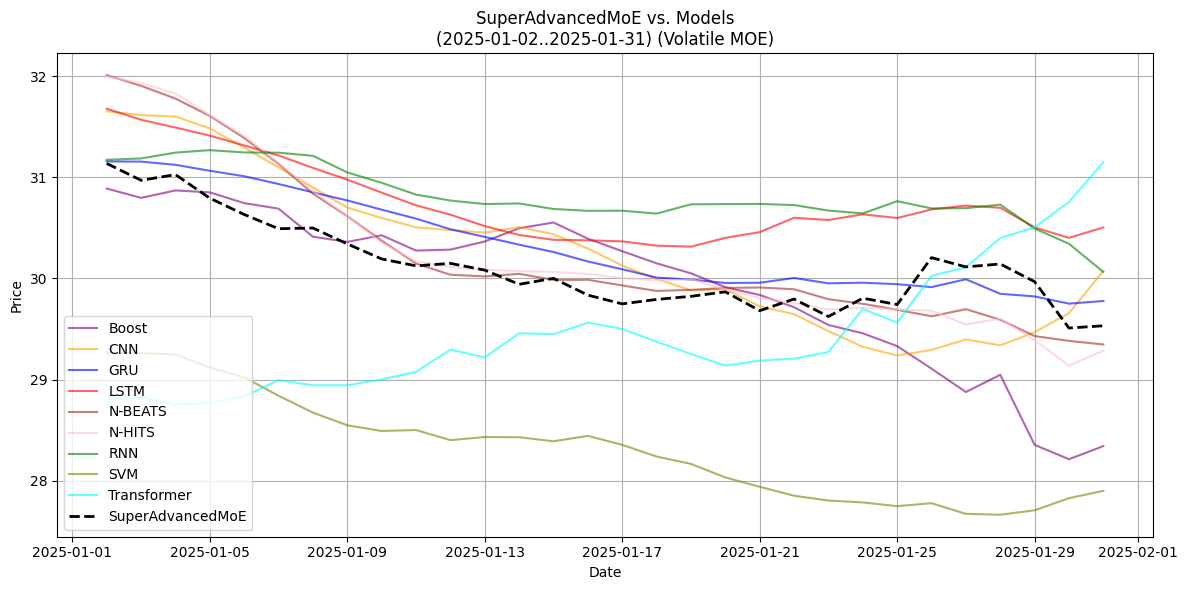

/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: 

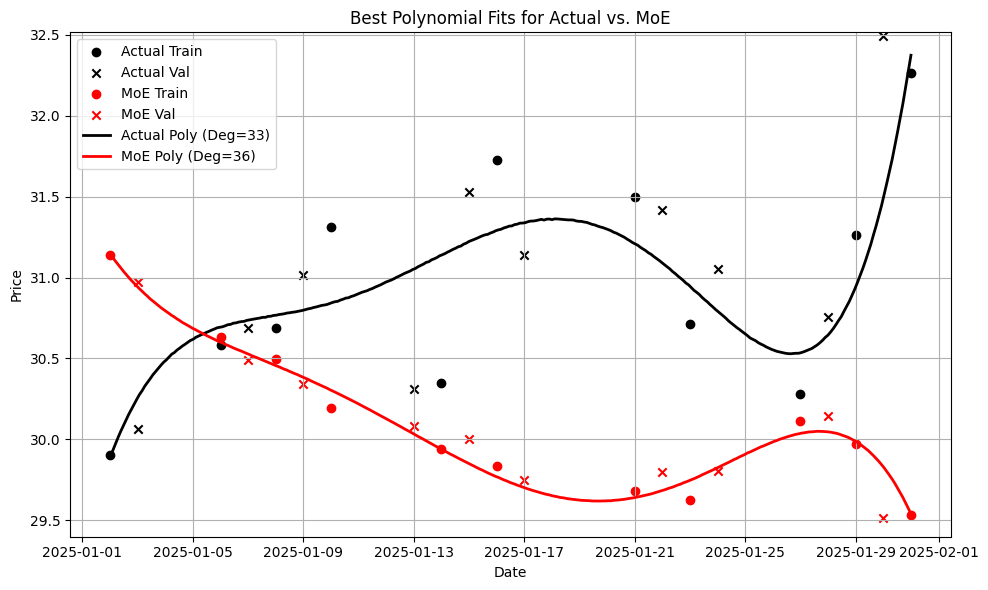


=== Best Polynomial Fitting Results ===
[Actual] => Degree=33, Val MSE=0.196528
     y = 3.1306e-130*x^33+5.7268e-127*x^32-5.2944e-122*x^31-1.6228e-117*x^30-3.3030e-113*x^29-5.3272e-109*x^28-6.4770e-105*x^27-3.8701e-101*x^26+1.1066e-96*x^25+5.3698e-92*x^24+1.5450e-87*x^23+3.5944e-83*x^22+7.3665e-79*x^21+1.3457e-74*x^20+2.1904e-70*x^19+2.8363e-66*x^18+1.8197e-62*x^17-3.9173e-58*x^16-2.2837e-53*x^15-7.0772e-49*x^14-1.7832e-44*x^13-3.9486e-40*x^12-7.7481e-36*x^11-1.3630e-31*x^10-1.8924e-27*x^9-1.6456e-23*x^8+1.9813e-19*x^7+1.5442e-14*x^6+5.0809e-10*x^5+1.2593e-05*x^4+2.5026e-01*x^3+3.3065e+03*x^2-1.4261e+07*x-3.1924e+12

[MoE] => Degree=36, Val MSE=0.015588
     y = -0.0000e+00*x^36-2.5209e-139*x^35-7.3678e-136*x^34+3.6811e-131*x^33+1.2284e-126*x^32+2.6340e-122*x^31+4.5900e-118*x^30+6.4438e-114*x^29+5.9969e-110*x^28-2.3357e-106*x^27-2.9732e-101*x^26-1.0177e-96*x^25-2.6124e-92*x^24-5.7826e-88*x^23-1.1524e-83*x^22-2.0581e-79*x^21-3.2609e-75*x^20-4.2884e-71*x^19-3.0768e-67*x^18+6.1757e-63*x

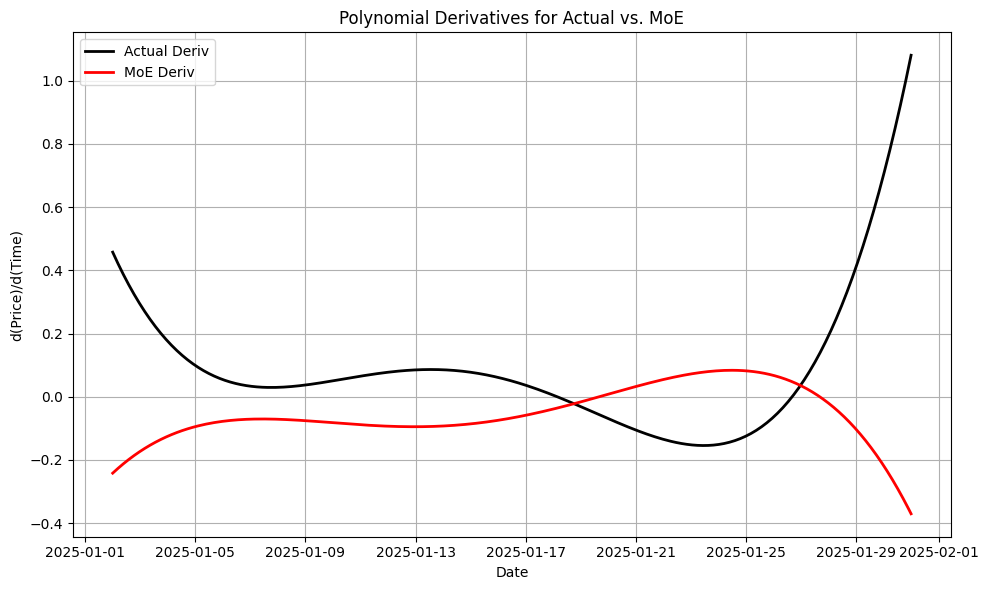

In [14]:
####################################################
# SUPER MERGED SCRIPT: Code Snippet 2 + Snippet 1
####################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import joblib

from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

############################################
# 0) Global seeds & device
############################################
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

############################################
# GLOBALS
############################################
BEST_MODELS_DIR = "."   # Where your best_{mt}_{YYYY-mm-dd}_V1 pt/pkl model files are
features = ["Price","Open","High","Low"]
WINDOW_SIZE = 35

# Example cutoffs (tweak if needed to match your data)
train_cutoff= pd.to_datetime("2024-07-01")
val_cutoff  = pd.to_datetime("2024-11-30")
test_cutoff = pd.to_datetime("2024-12-01")

############################################
# 1) Data Loading (like snippet 2 does)
############################################
def load_and_scale_data(train_csv="Silver Futures Historical Data.csv",
                        complete_csv="Silver Futures Historical Data_Complete.csv"):
    """
    Loads two CSVs:
      1) 'train_csv': for training date range, e.g. 'Silver Futures Historical Data.csv'
      2) 'complete_csv': the entire timeline, e.g. 'Silver Futures Historical Data_Complete.csv'
    Then sorts/drops columns, fits a MinMaxScaler from the train portion,
    returns (df_sorted, df_complete, scaler).
    """
    # Load train CSV
    df_traincsv = pd.read_csv(train_csv)
    df_traincsv["Date"] = pd.to_datetime(df_traincsv["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_traincsv.columns:
            df_traincsv.drop(columns=[col], errors="ignore", inplace=True)

    for feat in features:
        if feat not in df_traincsv.columns:
            df_traincsv[feat]= np.nan
        else:
            df_traincsv[feat]= df_traincsv[feat].astype(str).str.replace(",", "", regex=True)
            df_traincsv[feat]= pd.to_numeric(df_traincsv[feat], errors="coerce")

    df_traincsv.sort_values("Date", inplace=True)
    df_traincsv.reset_index(drop=True, inplace=True)

    # Simple date splits
    df_trn = df_traincsv[df_traincsv["Date"]< train_cutoff].copy()
    df_val = df_traincsv[(df_traincsv["Date"]>=train_cutoff)&(df_traincsv["Date"]<= val_cutoff)].copy()
    df_tst = df_traincsv[df_traincsv["Date"]>= test_cutoff].copy()

    df_trn_nonan= df_trn.dropna(subset=features)
    scaler= MinMaxScaler()
    if not df_trn_nonan.empty:
        scaler.fit(df_trn_nonan[features])

    df_trn_scaled= df_trn.copy()
    if not df_trn_nonan.empty:
        df_trn_scaled.loc[df_trn_nonan.index, features]= scaler.transform(df_trn_nonan[features])

    df_val_scaled= df_val.copy()
    val_no_nan= df_val_scaled.dropna(subset=features)
    if not val_no_nan.empty:
        df_val_scaled.loc[val_no_nan.index, features]= scaler.transform(val_no_nan[features])

    df_tst_scaled= df_tst.copy()
    if not df_tst_scaled.empty:
        train_mins= df_trn_nonan[features].min()
        df_tst_filled= df_tst_scaled[features].fillna(train_mins)
        df_tst_scaled.loc[:, features] = scaler.transform(df_tst_filled)

    df_scaled = pd.concat([df_trn_scaled, df_val_scaled, df_tst_scaled], ignore_index=True)
    df_scaled.sort_values("Date", inplace=True)
    df_scaled.reset_index(drop=True, inplace=True)

    # also load the complete CSV
    df_complete = pd.read_csv(complete_csv)
    df_complete["Date"]= pd.to_datetime(df_complete["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_complete.columns:
            df_complete.drop(columns=[col], errors="ignore", inplace=True)
    for feat in features:
        df_complete[feat]= df_complete[feat].astype(str).str.replace(",", "",regex=True).astype(float)
    df_complete.sort_values("Date", inplace=True)
    df_complete.reset_index(drop=True, inplace=True)

    return df_scaled, df_complete, scaler


############################################
# 2) Model Definitions & Loading
############################################
class BaseModel(nn.Module):
    def __init__(self, model_type="LSTM", window_width=35):
        super().__init__()
        self.model_type = model_type

        if model_type=="CNN":
            self.conv1 = nn.Conv1d(4,64,3)
            self.conv2 = nn.Conv1d(64,128,3)
            with torch.no_grad():
                dummy = torch.zeros(1,4,window_width)
                outdummy = self.conv2(F.relu(self.conv1(dummy)))
                conv_output_size = outdummy.shape[1]*outdummy.shape[2]
            self.fc = nn.Linear(conv_output_size,4)

        elif model_type=="LSTM":
            self.rnn = nn.LSTM(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)

        elif model_type=="GRU":
            self.rnn = nn.GRU(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)

        elif model_type=="RNN":
            self.rnn = nn.RNN(4,128,num_layers=2,nonlinearity="relu",batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)

        elif model_type=="EnhancedLSTM":
            self.rnn = nn.LSTM(4,128,num_layers=3,batch_first=True,dropout=0.2)
            self.bn  = nn.BatchNorm1d(128)
            self.dropout= nn.Dropout(0.2)
            self.fc= nn.Linear(128,4)

        elif model_type=="Transformer":
            self.input_linear = nn.Linear(4,128)
            enc_layer = nn.TransformerEncoderLayer(d_model=128, nhead=8, dropout=0.1)
            self.transformer_encoder = nn.TransformerEncoder(enc_layer, num_layers=3)
            self.fc = nn.Linear(128,4)

        elif model_type in ["N-BEATS","N-HITS"]:
            self.input_size= window_width*4
            self.blocks= nn.ModuleList([nn.Sequential(
                nn.Linear(self.input_size,128),
                nn.ReLU(),
                nn.Linear(128,128),
                nn.ReLU(),
                nn.Linear(128,4)
            ) for _ in range(3)])
        else:
            raise ValueError(f"Invalid model_type: {model_type}")

    def forward(self, x):
        if self.model_type=="CNN":
            x= x.permute(0,2,1)
            x= F.relu(self.conv1(x))
            x= F.relu(self.conv2(x))
            x= x.view(x.size(0),-1)
            return self.fc(x)
        elif self.model_type in ["LSTM","GRU","RNN"]:
            out, _= self.rnn(x)
            out= out[:,-1,:]
            return self.fc(out)
        elif self.model_type=="EnhancedLSTM":
            out, _= self.rnn(x)
            out = out[:,-1,:]
            out = self.bn(out)
            out = self.dropout(out)
            return self.fc(out)
        elif self.model_type=="Transformer":
            x= self.input_linear(x)   # [batch,window,128]
            x= x.permute(1,0,2)       # [window,batch,128]
            x= self.transformer_encoder(x)
            x= x[-1,:,:]
            return self.fc(x)
        elif self.model_type in ["N-BEATS","N-HITS"]:
            xflat= x.reshape(x.size(0), -1)
            forecast=0
            for block in self.blocks:
                forecast += block(xflat)
            return forecast
        else:
            raise ValueError("Invalid model_type")


class SklearnWrapper:
    def __init__(self, model):
        self.model= model
    def forward(self, x):
        arr= x.cpu().numpy().reshape(1,-1)
        pred= self.model.predict(arr)
        return torch.from_numpy(pred).float().to(x.device)
    def eval(self):
        pass
    def __call__(self, x):
        return self.forward(x)


def load_torch_model(model_type, window_size, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[PyTorch] Loading {model_type} from {path}")
    net= BaseModel(model_type, window_size).to(device)
    net.load_state_dict(torch.load(path, map_location=device))
    net.eval()
    return net

def load_sklearn_model(model_type, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[sklearn] Loading {model_type} => {path}")
    loaded= joblib.load(path)
    return SklearnWrapper(loaded)


############################################
# 3) "Rolling" or "Daily" Forecast (Snippet 2 style)
############################################
def get_latest_window(df_actual, current_date, window=35, scaler=None):
    mask= df_actual["Date"]< current_date
    sub= df_actual.loc[mask].copy()
    sub.sort_values("Date", inplace=True)
    if len(sub)< window:
        return None
    sub[features]= sub[features].fillna(method="ffill").fillna(method="bfill")
    arr= scaler.transform(sub[features].iloc[-window:].values)
    return arr

def forecast_n_days_from_date(model, df_actual, start_date, window=35, horizon=30,
                              device=None, scaler=None, noise_std=0.05):
    """
    Rolling forecast with mild random noise => more "volatility".
    """
    def add_noise_4d(prices, std=0.01):
        noise= np.random.normal(0.0, std, size=prices.shape)
        return np.clip(prices+noise, a_min=0, a_max=None)

    arr_window= get_latest_window(df_actual, start_date, window, scaler)
    if arr_window is None:
        return pd.DataFrame()

    rolling_buffer= np.copy(arr_window)
    forecast_records=[]
    cur_dt= pd.to_datetime(start_date)

    for i in range(horizon):
        X_in= torch.tensor(rolling_buffer,dtype=torch.float).unsqueeze(0).to(device)
        with torch.no_grad():
            out_scaled= model(X_in).cpu().numpy()[0]
        out_unscaled= scaler.inverse_transform(out_scaled.reshape(1,-1))[0]
        out_noisy= add_noise_4d(out_unscaled, noise_std)

        dayx= cur_dt+ pd.Timedelta(days=i)
        forecast_records.append({
            "ForecastDate": dayx,
            "Pred_Price_unscaled": out_noisy[0],
            "Pred_Open_unscaled":  out_noisy[1],
            "Pred_High_unscaled":  out_noisy[2],
            "Pred_Low_unscaled":   out_noisy[3]
        })

        out_noisy_scaled= scaler.transform(out_noisy.reshape(1,-1))[0]
        rolling_buffer= np.vstack([rolling_buffer[1:], out_noisy_scaled.reshape(1,-1)])

    return pd.DataFrame(forecast_records)


def rolling_train_validate_predict_moe(
    df_full, scaler_obj, model_types,
    start_train_cutoff=pd.to_datetime("2024-07-01"),
    start_val_cutoff=pd.to_datetime("2024-11-30"),
    start_pred=pd.to_datetime("2024-12-01"),
    end_pred=pd.to_datetime("2025-01-01"),
    horizon_days=30,
    do_daily_plots=False
):
    """
    Code Snippet 2 style: For each day in date range [start_pred..end_pred],
    we "load" each model with the naming best_{mt}_{day_i}_V1,
    forecast next horizon_days, etc. Return a big DF with all predictions.
    """
    df_sorted= df_full.copy()
    df_sorted.sort_values("Date", inplace=True)

    date_rng= pd.date_range(start_pred, end_pred, freq="D")
    all_records=[]

    for i, day_i in enumerate(date_rng):
        train_cutoff_i= start_train_cutoff + pd.Timedelta(days=i)
        val_cutoff_i  = start_val_cutoff   + pd.Timedelta(days=i)

        print(f"\n=== Rolling Day {day_i.date()} ===")
        print(f"  train_cutoff={train_cutoff_i.date()}  val_cutoff={val_cutoff_i.date()}")
        print(f"  Forecast next {horizon_days} days from {day_i.date()} w/ noise => more volatility")

        # Load each model from best_{mt}_{day_i}_V1
        model_dict={}
        for mt in model_types:
            out_file= f"best_{mt}_{day_i.strftime('%Y-%m-%d')}_V1"
            if mt in ["SVM","GPR","Boost"]:
                out_file+= ".pkl"
                net= load_sklearn_model(mt, os.path.join(BEST_MODELS_DIR, out_file))
            else:
                out_file+= ".pt"
                net= load_torch_model(mt, WINDOW_SIZE, os.path.join(BEST_MODELS_DIR, out_file))
            model_dict[mt]= net

        daily_fcst={}
        for mt, netobj in model_dict.items():
            df_fc= forecast_n_days_from_date(
                model=netobj,
                df_actual=df_sorted,
                start_date=day_i,
                window=WINDOW_SIZE,
                horizon=horizon_days,
                device=device,
                scaler=scaler_obj,
                noise_std=0.01
            )
            if not df_fc.empty:
                df_fc["BaseDate"]= day_i
                df_fc["Model"]= mt
                daily_fcst[mt]= df_fc
                all_records.append(df_fc)
            else:
                daily_fcst[mt]= pd.DataFrame()

        if do_daily_plots and (day_i== date_rng[-1]):
            pass  # Optionally, you can do daily plots here

    df_all= pd.concat(all_records, ignore_index=True) if all_records else pd.DataFrame()
    df_all.sort_values(["Model","BaseDate","ForecastDate"], inplace=True)
    return df_all


############################################
# 4) Mixture of Experts Computation (Snippet 2)
############################################
def build_mini_models_table(final_rolling_fcst, df_actual):
    """
    For each (model, baseDate), measure january performance => build table
    Code snippet 2 approach for "super advanced MoE".
    ...
    """
    start_jan= pd.to_datetime("2024-12-01")
    end_jan=   pd.to_datetime("2025-01-01")
    df_jan= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= start_jan)&
        (final_rolling_fcst["ForecastDate"]<= end_jan)
    ].copy()
    if df_jan.empty:
        return pd.DataFrame(), 0.01

    df_act_jan= df_actual[
        (df_actual["Date"]>= start_jan)&
        (df_actual["Date"]<= end_jan)
    ].copy()
    df_act_jan.rename(columns={"Date":"ForecastDate","Price":"ActualPrice"}, inplace=True)

    df_merge= pd.merge(
        df_jan[["Model","BaseDate","ForecastDate","Pred_Price_unscaled"]],
        df_act_jan[["ForecastDate","ActualPrice"]],
        on="ForecastDate",
        how="inner"
    )
    df_merge["AbsError"]= (df_merge["Pred_Price_unscaled"]- df_merge["ActualPrice"]).abs()

    # mae
    g_mae= df_merge.groupby(["Model","BaseDate"])["AbsError"].mean().reset_index()
    g_mae.rename(columns={"AbsError":"mae_jan"}, inplace=True)

    # slope alignment => quick polynomial fit
    def poly_slope_diff(sub):
        sub= sub.sort_values("ForecastDate")
        xvals= np.arange(len(sub))
        yvals= sub["Pred_Price_unscaled"].values
        if len(yvals)< 4:
            return 0.5
        coefs= polyfit(xvals,yvals,deg=2)
        y_pred= polyval(xvals, coefs)
        resid= yvals- y_pred
        sse= np.mean(resid**2)
        return float(np.exp(-sse))

    def group_slope_func(grp):
        grp["slopeAlign_jan"]= poly_slope_diff(grp)
        return grp

    df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
    df_slope_agg= df_slope.groupby(["Model","BaseDate"])["slopeAlign_jan"].mean().reset_index()

    # real vol
    df_act_jan_sorted= df_act_jan.drop_duplicates("ForecastDate").copy()
    df_act_jan_sorted.sort_values("ForecastDate", inplace=True)
    df_act_jan_sorted["DayChange"]= df_act_jan_sorted["ActualPrice"].diff()
    real_vol= df_act_jan_sorted["DayChange"].std(skipna=True)
    if pd.isna(real_vol) or real_vol< 1e-9:
        real_vol= 0.01

    def mini_volatility(sub):
        sub= sub.sort_values("ForecastDate")
        sub["DayChange"]= sub["Pred_Price_unscaled"].diff()
        vol_= sub["DayChange"].std(skipna=True)
        if pd.isna(vol_): vol_= 0.01
        return vol_

    g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()
    g_vol.rename(columns={0:"predVol_jan"}, inplace=True)

    def vol_align(v):
        ratio= v/ real_vol
        return np.exp(-abs(ratio-1.0))

    g_vol["volAlign_jan"]= g_vol["predVol_jan"].apply(vol_align)

    mini_models= pd.merge(g_mae, df_slope_agg, on=["Model","BaseDate"], how="left")
    mini_models= pd.merge(mini_models, g_vol[["Model","BaseDate","predVol_jan","volAlign_jan"]], on=["Model","BaseDate"], how="left")

    mae_min= mini_models["mae_jan"].min()
    mae_max= mini_models["mae_jan"].max()
    if np.isclose(mae_min, mae_max):
        mini_models["baseAcc"]= 1.0
    else:
        mini_models["baseAcc"]= 1.0- ((mini_models["mae_jan"]-mae_min)/(mae_max-mae_min))

    return mini_models, real_vol

def compute_super_advanced_moe(final_rolling_fcst, df_actual):
    """
    Creates the final MoE dataframe from snippet 2 approach.
    """
    print("\n=== SUPER ADVANCED MOE w/ Polynomials & Voting ===\n")
    mini_models, real_vol= build_mini_models_table(final_rolling_fcst, df_actual)
    if mini_models.empty:
        print("No january data => fallback => uniform daily average")
        return pd.DataFrame(columns=["ForecastDate","MOE_Price"])

    mm_dict={}
    for i,row in mini_models.iterrows():
        mm_dict[(row["Model"], row["BaseDate"])]= {
            "baseAcc": row["baseAcc"],
            "slopeAlign_jan": row["slopeAlign_jan"],
            "volAlign_jan": row["volAlign_jan"]
        }

    start_moe= pd.to_datetime("2025-01-02")
    end_moe=   pd.to_datetime("2025-01-31")
    all_days=  pd.date_range(start_moe, end_moe, freq="D")
    records=[]

    for d in all_days:
        df_d= final_rolling_fcst[ final_rolling_fcst["ForecastDate"]== d ].copy()
        if df_d.empty:
            continue

        d_prev= d - pd.Timedelta(days=1)
        ups=0
        downs=0
        total=0
        w_sums=0.0
        weighted_price=0.0

        for idx,row in df_d.iterrows():
            m= row["Model"]
            bD= row["BaseDate"]
            if (m,bD) not in mm_dict:
                continue
            baseAcc= mm_dict[(m,bD)]["baseAcc"]
            slopeA= mm_dict[(m,bD)]["slopeAlign_jan"]
            volA= mm_dict[(m,bD)]["volAlign_jan"]

            df_dprev= final_rolling_fcst[
                (final_rolling_fcst["Model"]==m)&
                (final_rolling_fcst["BaseDate"]==bD)&
                (final_rolling_fcst["ForecastDate"]==d_prev)
            ]
            if df_dprev.empty:
                dirFactor=1.0
            else:
                pd_today= row["Pred_Price_unscaled"]
                pd_yest= df_dprev["Pred_Price_unscaled"].values[0]
                if pd_today> pd_yest:
                    ups+=1
                    dirFactor=1.1
                elif pd_today< pd_yest:
                    downs+=1
                    dirFactor=0.9
                else:
                    dirFactor=1.0
                total+=1

            w= baseAcc* slopeA* volA* dirFactor
            w_sums+= w
            weighted_price+= w* row["Pred_Price_unscaled"]

        if np.isclose(w_sums,0.0):
            day_moe= df_d["Pred_Price_unscaled"].mean()
        else:
            day_moe= weighted_price/ w_sums

        if total>0:
            fraction_up= ups/ total
            fraction_down= downs/ total
            if fraction_up> 0.7:
                day_moe*= 1.01
            elif fraction_down> 0.7:
                day_moe*= 0.99

        day_moe+= np.random.normal(0, day_moe*0.002)
        records.append({"ForecastDate": d, "MOE_Price": day_moe})

    df_moe= pd.DataFrame(records)
    df_moe.sort_values("ForecastDate", inplace=True)
    return df_moe


############################################
# 5) Plot + Polynomial Fitting from Snippet 1
############################################
def plot_super_advanced_moe_vs_models(final_rolling_fcst, df_moe,
                                      from_d=pd.to_datetime("2025-01-02"),
                                      to_d=pd.to_datetime("2025-01-31")):
    """
    We can display all 9 model lines + the advanced MoE in [from_d..to_d].
    Similar to snippet 2 code.
    """
    df_sel= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= from_d)&
        (final_rolling_fcst["ForecastDate"]<= to_d)
    ].copy()

    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","EnhancedLSTM":"magenta",
        "Transformer":"cyan","N-BEATS":"brown","N-HITS":"pink","SVM":"olive","GPR":"teal","Boost":"purple"
    }
    for m in df_sel["Model"].unique():
        df_m= df_sel[df_sel["Model"]== m].copy()
        df_m_agg= df_m.groupby("ForecastDate", as_index=False)["Pred_Price_unscaled"].mean()
        c= color_map.get(m,"gray")
        plt.plot(df_m_agg["ForecastDate"], df_m_agg["Pred_Price_unscaled"], color=c, alpha=0.6, label=m)

    df_moe_sub= df_moe[
        (df_moe["ForecastDate"]>= from_d)&
        (df_moe["ForecastDate"]<= to_d)
    ].copy()
    if not df_moe_sub.empty:
        plt.plot(df_moe_sub["ForecastDate"], df_moe_sub["MOE_Price"],
                 color="black",linestyle="--",lw=2, label="SuperAdvancedMoE")

    plt.title(f"SuperAdvancedMoE vs. Models\n({from_d.date()}..{to_d.date()}) (Volatile MOE)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def polynomial_fitting_actual_and_moe(df_moe,
                                      csv_actual="Silver Futures Historical Data_Final Pure Predictions.csv",
                                      max_degree=70):
    """
    As in snippet 1: we do polynomial fittings for "MoE" vs. "Actual"
    (like Code Snippet 1's final steps).
    """
    # Load actual data
    df_actual = pd.read_csv(csv_actual)
    df_actual["Date"] = pd.to_datetime(df_actual["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_actual.columns:
            df_actual.drop(columns=[col], errors="ignore", inplace=True)
    if "Price" in df_actual.columns:
        df_actual["Price"]= df_actual["Price"].astype(str).str.replace(",", "", regex=True).astype(float)
    df_actual.sort_values("Date", inplace=True)
    df_actual.reset_index(drop=True, inplace=True)

    # rename MoE
    df_moe_rename= df_moe.rename(columns={"ForecastDate":"Date","MOE_Price":"MoE"})
    df_moe_rename.sort_values("Date", inplace=True)
    df_moe_rename.reset_index(drop=True, inplace=True)

    # merge => columns: ["Date","MoE","Price"]
    df_merge= pd.merge(
        df_moe_rename, df_actual[["Date","Price"]],
        on="Date", how="inner"
    ).rename(columns={"Price":"Actual"})

    if df_merge.empty:
        print("No overlapping dates => cannot do polynomial fitting.")
        return

    df_merge.sort_values("Date", inplace=True)
    df_merge.reset_index(drop=True, inplace=True)

    columns_to_fit= ["Actual","MoE"]
    df_merge["mdates_num"]= mdates.date2num(df_merge["Date"])
    n_points= len(df_merge)
    idx= np.arange(n_points)
    train_mask = (idx % 2==0)
    val_mask= ~train_mask

    best_poly_info= {}

    def format_poly(coeffs):
        terms=[]
        deg= len(coeffs)-1
        for i,c in enumerate(coeffs):
            p= deg-i
            if p>1:
                terms.append(f"{c:+.4e}*x^{p}")
            elif p==1:
                terms.append(f"{c:+.4e}*x")
            else:
                terms.append(f"{c:+.4e}")
        expr= "".join(terms).replace("+-","-")
        if expr.startswith("+"):
            expr= expr[1:]
        return expr

    # Fit polynomials
    from sklearn.metrics import mean_squared_error
    for col in columns_to_fit:
        x_train= df_merge.loc[train_mask,"mdates_num"].values
        y_train= df_merge.loc[train_mask,col].values
        x_val= df_merge.loc[val_mask,"mdates_num"].values
        y_val= df_merge.loc[val_mask,col].values

        best_deg= None
        best_mse= float("inf")
        best_coefs= None

        for d_ in range(1, max_degree+1):
            coefs= np.polyfit(x_train, y_train, d_)
            preds_val= np.polyval(coefs, x_val)
            mse_= mean_squared_error(y_val, preds_val)
            if mse_< best_mse:
                best_mse= mse_
                best_deg= d_
                best_coefs= coefs
        best_poly_info[col]= {"degree": best_deg, "mse":best_mse, "coeffs": best_coefs}

    # Plot the best polynomials
    plt.figure(figsize=(10,6))
    # scatter actual data
    plt.scatter(df_merge.loc[train_mask,"Date"], df_merge.loc[train_mask,"Actual"],
                color="black", marker="o", label="Actual Train")
    plt.scatter(df_merge.loc[val_mask,"Date"], df_merge.loc[val_mask,"Actual"],
                color="black", marker="x", label="Actual Val")

    # scatter MoE data
    plt.scatter(df_merge.loc[train_mask,"Date"], df_merge.loc[train_mask,"MoE"],
                color="red", marker="o", label="MoE Train")
    plt.scatter(df_merge.loc[val_mask,"Date"], df_merge.loc[val_mask,"MoE"],
                color="red", marker="x", label="MoE Val")

    x_dense= np.linspace(df_merge["mdates_num"].min(), df_merge["mdates_num"].max(), 300)
    x_dense_dates= [mdates.num2date(xx) for xx in x_dense]

    color_map= {"Actual":"black","MoE":"red"}
    for col in columns_to_fit:
        info= best_poly_info[col]
        deg_= info["degree"]
        coefs_= info["coeffs"]
        color_= color_map[col] if col in color_map else "gray"
        y_dense= np.polyval(coefs_, x_dense)
        plt.plot(x_dense_dates, y_dense, color=color_, linewidth=2,
                 label=f"{col} Poly (Deg={deg_})")

    plt.title("Best Polynomial Fits for Actual vs. MoE")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\n=== Best Polynomial Fitting Results ===")
    for col in columns_to_fit:
        deg_= best_poly_info[col]["degree"]
        mse_= best_poly_info[col]["mse"]
        coefs_= best_poly_info[col]["coeffs"]
        expr_= format_poly(coefs_)
        print(f"[{col}] => Degree={deg_}, Val MSE={mse_:.6f}")
        print(f"     y = {expr_}\n")

    # Derivative
    plt.figure(figsize=(10,6))
    for col in columns_to_fit:
        coefs_= best_poly_info[col]["coeffs"]
        d_coefs_= np.polyder(coefs_)
        d_expr_= format_poly(d_coefs_)
        y_deriv= np.polyval(d_coefs_, x_dense)

        color_ = color_map[col] if col in color_map else "gray"
        plt.plot(x_dense_dates, y_deriv, color=color_, linewidth=2, label=f"{col} Deriv")

        print(f"=== Derivative for {col} (Degree {best_poly_info[col]['degree']-1}) ===")
        print(f"   d/dx: {d_expr_}\n")

    plt.title("Polynomial Derivatives for Actual vs. MoE")
    plt.xlabel("Date")
    plt.ylabel("d(Price)/d(Time)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


############################################
# 6) MAIN EXAMPLE
############################################
if __name__=="__main__":
    # 1) Load & scale data
    df_scaled, df_complete_all, scaler= load_and_scale_data(
        "Silver Futures Historical Data.csv",
        "Silver Futures Historical Data_Complete.csv"
    )

    # 2) Rolling multi-day predictions for each day,
    #    then compute the super advanced MoE.
    #    This uses snippet 2's logic.
    final_rolling_fc= rolling_train_validate_predict_moe(
        df_full= df_complete_all,
        scaler_obj= scaler,
        model_types=["LSTM","GRU","RNN","CNN","Transformer","N-BEATS","N-HITS","SVM","Boost"],
        start_train_cutoff=train_cutoff,
        start_val_cutoff=val_cutoff,
        start_pred=pd.to_datetime("2024-12-01"),
        end_pred=pd.to_datetime("2025-01-02"),
        horizon_days=30,
        do_daily_plots=False
    )
    print("\n=== HEAD of final_rolling_fc ===")
    print(final_rolling_fc.head(40))

    df_moe= compute_super_advanced_moe(final_rolling_fc, df_complete_all)

    # 3) Plot super advanced MoE vs. the 9 base models
    plot_super_advanced_moe_vs_models(
        final_rolling_fc,
        df_moe,
        from_d=pd.to_datetime("2025-01-02"),
        to_d=pd.to_datetime("2025-01-31")
    )

    # 4) Polynomial Fitting: Actual vs. MoE
    polynomial_fitting_actual_and_moe(
        df_moe,
        csv_actual="Silver Futures Historical Data_Final Pure Predictions.csv",
        max_degree=60
    )


   



=== Rolling Day 2024-12-01 ===
  train_cutoff=2024-07-01  val_cutoff=2024-11-30
  Forecast next 30 days from 2024-12-01
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-01_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-01_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-01_V1.pt
[PyTorch] Loading CNN from ./best_CNN_2024-12-01_V1.pt
[PyTorch] Loading Transformer from ./best_Transformer_2024-12-01_V1.pt
[PyTorch] Loading N-BEATS from ./best_N-BEATS_2024-12-01_V1.pt
[PyTorch] Loading N-HITS from ./best_N-HITS_2024-12-01_V1.pt
[sklearn] Loading SVM => ./best_SVM_2024-12-01_V1.pkl
[sklearn] Loading Boost => ./best_Boost_2024-12-01_V1.pkl
[MoE] No saved file for 2024-12-01, skipping load.

=== Rolling Day 2024-12-02 ===
  train_cutoff=2024-07-02  val_cutoff=2024-12-01
  Forecast next 30 days from 2024-12-02
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-02_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-02_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-02_V1.pt
[PyTorch] L

/tmp/ipykernel_846914/4163853148.py:413: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
/tmp/ipykernel_846914/4163853148.py:432: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()



=== HEAD of df_rolled_all (All Models + MoE) ===
    Model ForecastDate  Pred_Price_unscaled
0   Boost   2024-12-01            32.238688
1   Boost   2024-12-02            32.210056
2   Boost   2024-12-03            32.087696
3   Boost   2024-12-04            32.005493
4   Boost   2024-12-05            32.131197
5   Boost   2024-12-06            31.819541
6   Boost   2024-12-07            31.066166
7   Boost   2024-12-08            31.017505
8   Boost   2024-12-09            30.778014
9   Boost   2024-12-10            30.779833
10  Boost   2024-12-11            30.740914
11  Boost   2024-12-12            31.027901
12  Boost   2024-12-13            31.020646
13  Boost   2024-12-14            31.203121
14  Boost   2024-12-15            31.238620
15  Boost   2024-12-16            31.153085
16  Boost   2024-12-17            30.969380
17  Boost   2024-12-18            31.142427
18  Boost   2024-12-19            30.901898
19  Boost   2024-12-20            31.023460


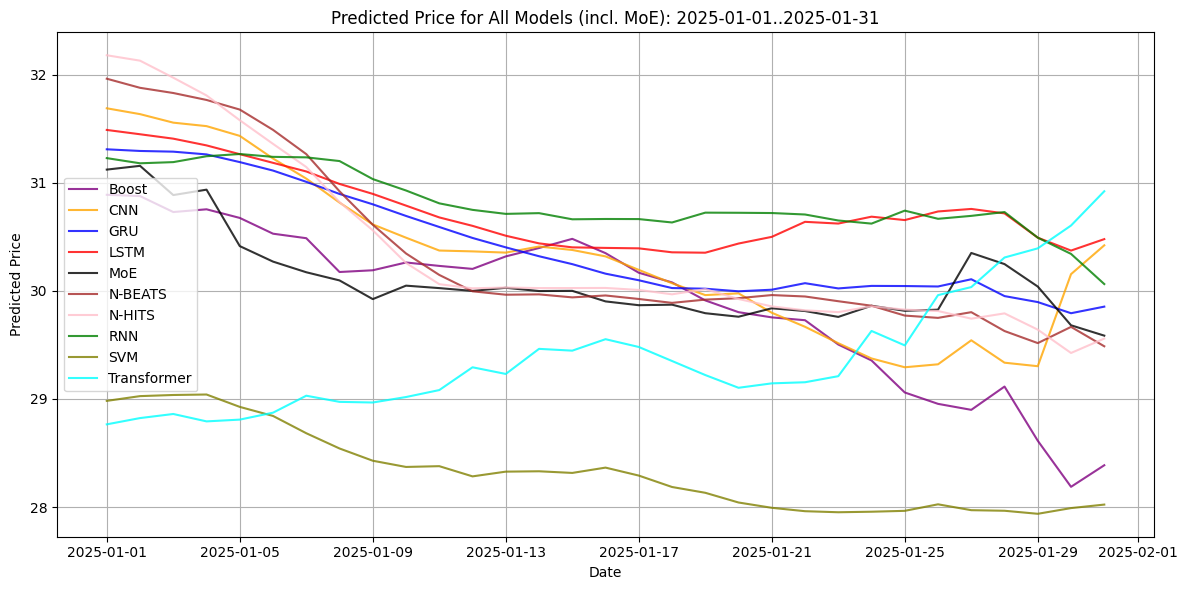


=== HEAD of df_diff_all (Daily Differences) ===
    Model       Date  Pred_Price_unscaled  ActualPrice  DailyDiff  AbsError
0   Boost 2024-12-02            32.210056       30.742   1.468056  1.468056
1   Boost 2024-12-03            32.087696       31.363   0.724696  0.724696
2   Boost 2024-12-04            32.005493       31.786   0.219493  0.219493
3   Boost 2024-12-05            32.131197       31.406   0.725197  0.725197
4   Boost 2024-12-06            31.819541       31.462   0.357541  0.357541
5   Boost 2024-12-09            30.778014       32.481  -1.702986  1.702986
6   Boost 2024-12-10            30.779833       32.612  -1.832167  1.832167
7   Boost 2024-12-11            30.740914       32.823  -2.082086  2.082086
8   Boost 2024-12-12            31.027901       31.482  -0.454099  0.454099
9   Boost 2024-12-13            31.020646       30.892   0.128646  0.128646
10  Boost 2024-12-16            31.153085       30.927   0.226085  0.226085
11  Boost 2024-12-17            30.9693

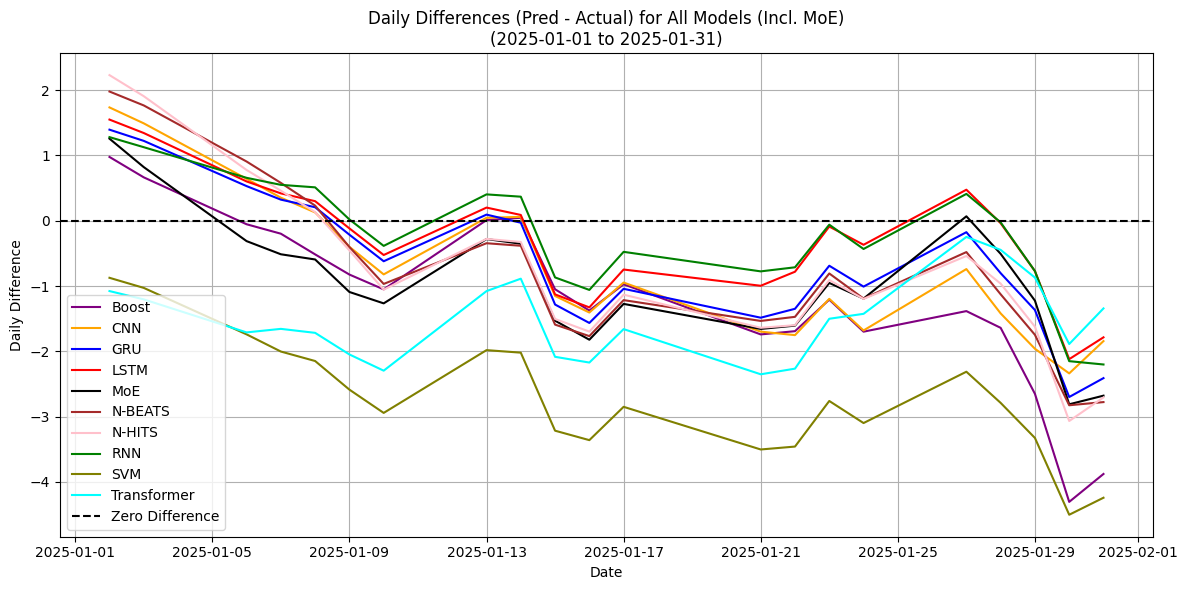


=== Model Scores (Including MoE) in the Test Period (Jan 2025) ===
         Model  cumulative_error  trend_matching_rate  normalized_error_score  \
0          RNN         15.248643                 0.55                1.000000   
1      N-BEATS         26.097177                 0.50                0.738561   
2  Transformer         31.923790                 0.55                0.598146   
3       N-HITS         26.197827                 0.45                0.736136   
4        Boost         27.934878                 0.45                0.694275   
5          MoE         23.807069                 0.40                0.793751   
6         LSTM         15.772675                 0.25                0.987371   
7          CNN         23.808149                 0.30                0.793725   
8          GRU         20.514839                 0.20                0.873090   
9          SVM         56.744171                 0.45                0.000000   

   combined_confidence  
0             0

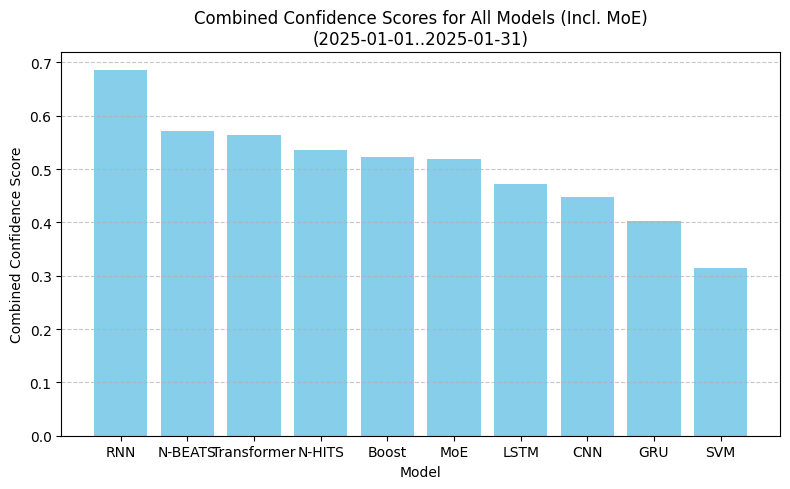


=== Best Polynomial Fitting Results for Top-5 + Actual in 2025-01-01..2025-01-31 ===
[Actual] => Deg=4  ValMSE=0.233707
    y = 1.3430e-08*x^4-5.4002e-04*x^3-2.3620e-04*x^2+2.1829e+05*x-2.1944e+09

[RNN] => Deg=9  ValMSE=0.004190
    y = -5.8165e-28*x^9+1.4293e-23*x^8+2.2205e-19*x^7-7.9234e-16*x^6-9.4908e-11*x^5-1.9101e-06*x^4-6.3994e-03*x^3+7.2845e+02*x^2+1.8978e+07*x-3.1203e+11

[N-BEATS] => Deg=5  ValMSE=0.013492
    y = -5.8794e-10*x^5+3.5515e-05*x^4-4.7984e-01*x^3-9.4115e+03*x^2+2.8614e+08*x-1.9205e+12

[Transformer] => Deg=9  ValMSE=0.021945
    y = 5.2865e-28*x^9-1.2987e-23*x^8-2.0181e-19*x^7+7.1881e-16*x^6+8.6222e-11*x^5+1.7356e-06*x^4+5.8230e-03*x^3-6.6164e+02*x^2-1.7241e+07*x+2.8341e+11

[N-HITS] => Deg=5  ValMSE=0.010286
    y = -1.7199e-10*x^5+1.0385e-05*x^4-1.4023e-01*x^3-2.7519e+03*x^2+8.3616e+07*x-5.6100e+11

[Boost] => Deg=7  ValMSE=0.031598
    y = 5.6053e-19*x^7-2.0925e-14*x^6-9.7125e-11*x^5+5.8456e-06*x^4+1.1806e-01*x^3-7.8780e+02*x^2-6.8868e+07*x+7.4526e+11



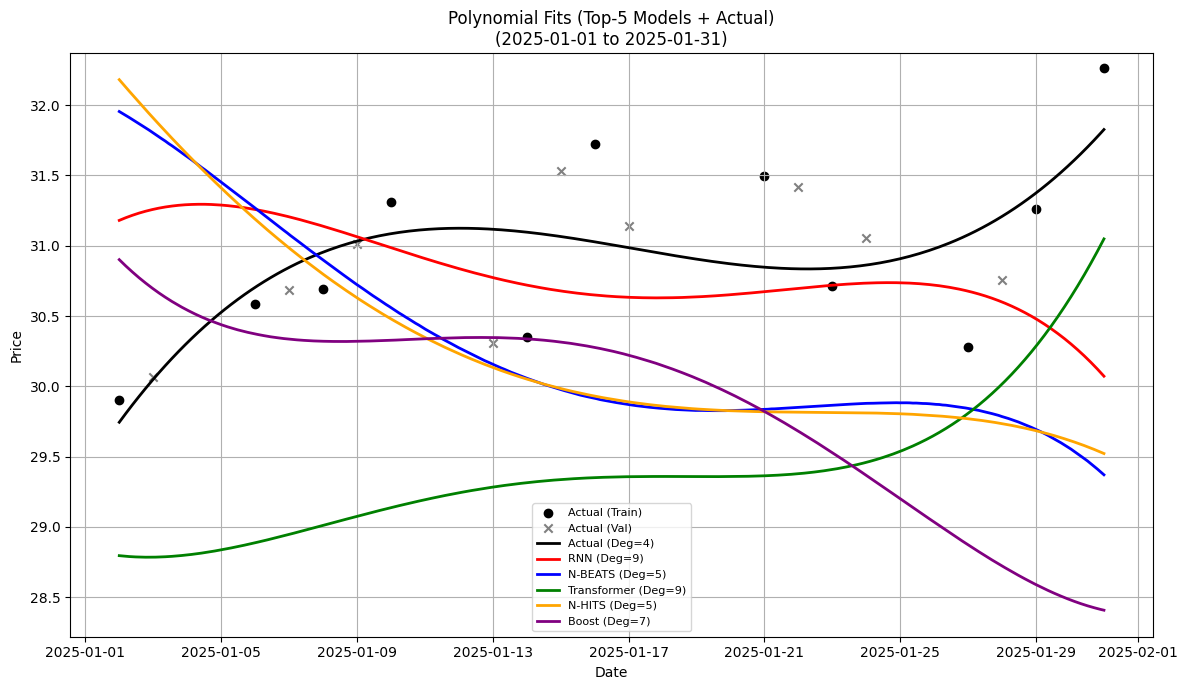

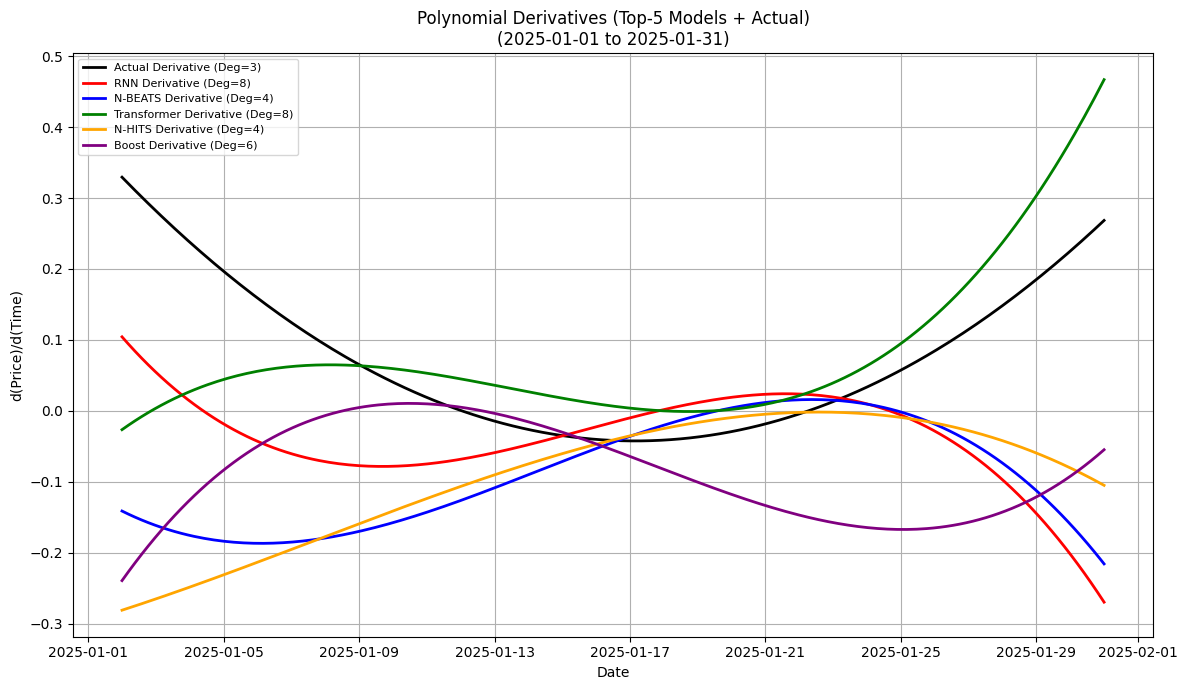


All done!


In [ ]:
########################################################
# COMPLETE UPDATED SCRIPT: "MoE" included in everything,
# focusing all plots & metrics on 2025-01-01..2025-01-31
########################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import joblib

from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

############################################
# Global seeds & device
############################################
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

############################################
# Globals
############################################
BEST_MODELS_DIR = "."   
features = ["Price","Open","High","Low"]
WINDOW_SIZE = 35

train_cutoff= pd.to_datetime("2024-07-01")
val_cutoff  = pd.to_datetime("2024-11-30")
test_cutoff = pd.to_datetime("2024-12-01")

# This is our main "test focus" range for plotting & evaluation
PLOT_START = pd.to_datetime("2025-01-01")
PLOT_END   = pd.to_datetime("2025-01-31")


############################################
# 1) Load & scale data
############################################
def load_and_scale_data(train_csv="Silver Futures Historical Data.csv",
                        complete_csv="Silver Futures Historical Data_Complete.csv"):
    df_traincsv = pd.read_csv(train_csv)
    df_traincsv["Date"] = pd.to_datetime(df_traincsv["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_traincsv.columns:
            df_traincsv.drop(columns=[col], errors="ignore", inplace=True)

    for feat in features:
        if feat not in df_traincsv.columns:
            df_traincsv[feat]= np.nan
        else:
            df_traincsv[feat]= df_traincsv[feat].astype(str).str.replace(",", "", regex=True)
            df_traincsv[feat]= pd.to_numeric(df_traincsv[feat], errors="coerce")

    df_traincsv.sort_values("Date", inplace=True)
    df_traincsv.reset_index(drop=True, inplace=True)

    # Splits
    df_trn = df_traincsv[df_traincsv["Date"]< train_cutoff].copy()
    df_val = df_traincsv[(df_traincsv["Date"]>=train_cutoff)&(df_traincsv["Date"]<= val_cutoff)].copy()
    df_tst = df_traincsv[df_traincsv["Date"]>= test_cutoff].copy()

    df_trn_nonan= df_trn.dropna(subset=features)
    scaler= MinMaxScaler()
    if not df_trn_nonan.empty:
        scaler.fit(df_trn_nonan[features])

    df_trn_scaled= df_trn.copy()
    if not df_trn_nonan.empty:
        df_trn_scaled.loc[df_trn_nonan.index, features]= scaler.transform(df_trn_nonan[features])

    df_val_scaled= df_val.copy()
    val_no_nan= df_val_scaled.dropna(subset=features)
    if not val_no_nan.empty:
        df_val_scaled.loc[val_no_nan.index, features]= scaler.transform(val_no_nan[features])

    df_tst_scaled= df_tst.copy()
    if not df_tst_scaled.empty:
        train_mins= df_trn_nonan[features].min()
        df_tst_filled= df_tst_scaled[features].fillna(train_mins)
        df_tst_scaled.loc[:, features] = scaler.transform(df_tst_filled)

    df_scaled = pd.concat([df_trn_scaled, df_val_scaled, df_tst_scaled], ignore_index=True)
    df_scaled.sort_values("Date", inplace=True)
    df_scaled.reset_index(drop=True, inplace=True)

    # Also load the complete CSV
    df_complete = pd.read_csv(complete_csv)
    df_complete["Date"]= pd.to_datetime(df_complete["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_complete.columns:
            df_complete.drop(columns=[col], errors="ignore", inplace=True)
    for feat in features:
        df_complete[feat]= df_complete[feat].astype(str).str.replace(",", "",regex=True).astype(float)
    df_complete.sort_values("Date", inplace=True)
    df_complete.reset_index(drop=True, inplace=True)

    return df_scaled, df_complete, scaler


############################################
# 2) Model definitions & loading
############################################
class BaseModel(nn.Module):
    def __init__(self, model_type="LSTM", window_width=35):
        super().__init__()
        self.model_type = model_type

        if model_type=="CNN":
            self.conv1 = nn.Conv1d(4,64,3)
            self.conv2 = nn.Conv1d(64,128,3)
            with torch.no_grad():
                dummy = torch.zeros(1,4,window_width)
                outdummy = self.conv2(F.relu(self.conv1(dummy)))
                conv_output_size = outdummy.shape[1]*outdummy.shape[2]
            self.fc = nn.Linear(conv_output_size,4)
        elif model_type=="LSTM":
            self.rnn = nn.LSTM(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)
        elif model_type=="GRU":
            self.rnn = nn.GRU(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)
        elif model_type=="RNN":
            self.rnn = nn.RNN(4,128,num_layers=2,nonlinearity="relu",batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)
        elif model_type=="EnhancedLSTM":
            self.rnn = nn.LSTM(4,128,num_layers=3,batch_first=True,dropout=0.2)
            self.bn  = nn.BatchNorm1d(128)
            self.dropout= nn.Dropout(0.2)
            self.fc= nn.Linear(128,4)
        elif model_type=="Transformer":
            self.input_linear = nn.Linear(4,128)
            enc_layer = nn.TransformerEncoderLayer(d_model=128, nhead=8, dropout=0.1)
            self.transformer_encoder = nn.TransformerEncoder(enc_layer, num_layers=3)
            self.fc = nn.Linear(128,4)
        elif model_type in ["N-BEATS","N-HITS"]:
            self.input_size= window_width*4
            self.blocks= nn.ModuleList([nn.Sequential(
                nn.Linear(self.input_size,128),
                nn.ReLU(),
                nn.Linear(128,128),
                nn.ReLU(),
                nn.Linear(128,4)
            ) for _ in range(3)])
        else:
            raise ValueError(f"Invalid model_type: {model_type}")

    def forward(self, x):
        if self.model_type=="CNN":
            x= x.permute(0,2,1)
            x= F.relu(self.conv1(x))
            x= F.relu(self.conv2(x))
            x= x.view(x.size(0),-1)
            return self.fc(x)
        elif self.model_type in ["LSTM","GRU","RNN"]:
            out, _= self.rnn(x)
            out= out[:,-1,:]
            return self.fc(out)
        elif self.model_type=="EnhancedLSTM":
            out, _= self.rnn(x)
            out = out[:,-1,:]
            out = self.bn(out)
            out = self.dropout(out)
            return self.fc(out)
        elif self.model_type=="Transformer":
            x= self.input_linear(x)   # [batch,window,128]
            x= x.permute(1,0,2)       # [window,batch,128]
            x= self.transformer_encoder(x)
            x= x[-1,:,:]
            return self.fc(x)
        elif self.model_type in ["N-BEATS","N-HITS"]:
            xflat= x.reshape(x.size(0), -1)
            forecast=0
            for block in self.blocks:
                forecast += block(xflat)
            return forecast
        else:
            raise ValueError("Invalid model_type")


class SklearnWrapper:
    def __init__(self, model):
        self.model= model
    def forward(self, x):
        arr= x.cpu().numpy().reshape(1,-1)
        pred= self.model.predict(arr)
        return torch.from_numpy(pred).float().to(x.device)
    def eval(self):
        pass
    def __call__(self, x):
        return self.forward(x)


def load_torch_model(model_type, window_size, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[PyTorch] Loading {model_type} from {path}")
    net= BaseModel(model_type, window_size).to(device)
    net.load_state_dict(torch.load(path, map_location=device))
    net.eval()
    return net

def load_sklearn_model(model_type, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[sklearn] Loading {model_type} => {path}")
    loaded= joblib.load(path)
    return SklearnWrapper(loaded)


############################################
# 3) Rolling multi-day Forecast
############################################
def get_latest_window(df_actual, current_date, window=35, scaler=None):
    mask= df_actual["Date"]< current_date
    sub= df_actual.loc[mask].copy()
    sub.sort_values("Date", inplace=True)
    if len(sub)< window:
        return None
    sub[features]= sub[features].fillna(method="ffill").fillna(method="bfill")
    arr= scaler.transform(sub[features].iloc[-window:].values)
    return arr

def forecast_n_days_from_date(model, df_actual, start_date, window=35, horizon=30,
                              device=None, scaler=None, noise_std=0.01):
    """
    Rolling forecast with mild random noise => more volatility.
    """
    def add_noise_4d(prices, std=0.01):
        noise= np.random.normal(0.0, std, size=prices.shape)
        return np.clip(prices+noise, a_min=0, a_max=None)

    arr_window= get_latest_window(df_actual, start_date, window, scaler)
    if arr_window is None:
        return pd.DataFrame()

    rolling_buffer= np.copy(arr_window)
    forecast_records=[]
    cur_dt= pd.to_datetime(start_date)

    for i in range(horizon):
        X_in= torch.tensor(rolling_buffer,dtype=torch.float).unsqueeze(0).to(device)
        with torch.no_grad():
            out_scaled= model(X_in).cpu().numpy()[0]
        out_unscaled= scaler.inverse_transform(out_scaled.reshape(1,-1))[0]
        out_noisy= add_noise_4d(out_unscaled, noise_std)

        dayx= cur_dt+ pd.Timedelta(days=i)
        forecast_records.append({
            "ForecastDate": dayx,
            "Pred_Price_unscaled": out_noisy[0],
            "Pred_Open_unscaled":  out_noisy[1],
            "Pred_High_unscaled":  out_noisy[2],
            "Pred_Low_unscaled":   out_noisy[3]
        })

        out_noisy_scaled= scaler.transform(out_noisy.reshape(1,-1))[0]
        rolling_buffer= np.vstack([rolling_buffer[1:], out_noisy_scaled.reshape(1,-1)])

    return pd.DataFrame(forecast_records)


def rolling_train_validate_predict_moe(
    df_full, scaler_obj, model_types,
    start_train_cutoff=pd.to_datetime("2024-07-01"),
    start_val_cutoff=pd.to_datetime("2024-11-30"),
    start_pred=pd.to_datetime("2024-12-01"),
    end_pred=pd.to_datetime("2025-01-01"),
    horizon_days=30
):
    """
    For each day in date range [start_pred..end_pred],
    load the best_{mt}_{YYYY-mm-dd}_V1 model, forecast next horizon_days, etc.
    Returns a big DF with predictions from all *loaded* models.
    (If 'MoE' is in model_types, we skip loading from disk unless a file is found.)
    """
    df_sorted= df_full.copy()
    df_sorted.sort_values("Date", inplace=True)

    date_rng= pd.date_range(start_pred, end_pred, freq="D")
    all_records=[]

    for i, day_i in enumerate(date_rng):
        train_cutoff_i= start_train_cutoff + pd.Timedelta(days=i)
        val_cutoff_i  = start_val_cutoff   + pd.Timedelta(days=i)

        print(f"\n=== Rolling Day {day_i.date()} ===")
        print(f"  train_cutoff={train_cutoff_i.date()}  val_cutoff={val_cutoff_i.date()}")
        print(f"  Forecast next {horizon_days} days from {day_i.date()}")

        model_dict={}
        for mt in model_types:
            # If "MoE", check if there's a file "best_MoE_{day_i}_V1" to load
            if mt=="MoE":
                out_file= f"best_MoE_{day_i.strftime('%Y-%m-%d')}_V1"
                pt_file= os.path.join(BEST_MODELS_DIR, out_file+".pt")
                pkl_file= os.path.join(BEST_MODELS_DIR, out_file+".pkl")
                if os.path.exists(pt_file):
                    net= load_torch_model(mt, WINDOW_SIZE, pt_file)
                    model_dict[mt]= net
                elif os.path.exists(pkl_file):
                    net= load_sklearn_model(mt, pkl_file)
                    model_dict[mt]= net
                else:
                    print(f"[MoE] No saved file for {day_i.date()}, skipping load.")
                continue

            # For normal models
            out_file= f"best_{mt}_{day_i.strftime('%Y-%m-%d')}_V1"
            if mt in ["SVM","GPR","Boost"]:
                out_file+= ".pkl"
                net= load_sklearn_model(mt, os.path.join(BEST_MODELS_DIR, out_file))
            else:
                out_file+= ".pt"
                net= load_torch_model(mt, WINDOW_SIZE, os.path.join(BEST_MODELS_DIR, out_file))
            model_dict[mt]= net

        for mt, netobj in model_dict.items():
            df_fc= forecast_n_days_from_date(
                model=netobj,
                df_actual=df_sorted,
                start_date=day_i,
                window=WINDOW_SIZE,
                horizon=horizon_days,
                device=device,
                scaler=scaler_obj,
                noise_std=0.01
            )
            if not df_fc.empty:
                df_fc["BaseDate"]= day_i
                df_fc["Model"]= mt
                all_records.append(df_fc)

    df_all= pd.concat(all_records, ignore_index=True) if all_records else pd.DataFrame()
    if not df_all.empty:
        df_all.sort_values(["Model","BaseDate","ForecastDate"], inplace=True)
    return df_all


############################################
# 4) Compute Mixture of Experts for entire [2024-12-01..2025-01-31]
############################################
def build_mini_models_table(final_rolling_fcst, df_actual):
    """
    Use [2024-12-01..2025-01-01] as the weighting period
    to measure each model's performance for weighting.
    """
    start_jan= pd.to_datetime("2024-12-01")
    end_jan=   pd.to_datetime("2025-01-01")

    df_jan= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= start_jan)&
        (final_rolling_fcst["ForecastDate"]<= end_jan)
    ].copy()
    if df_jan.empty:
        return pd.DataFrame(), 0.01

    df_act_jan= df_actual[
        (df_actual["Date"]>= start_jan)&
        (df_actual["Date"]<= end_jan)
    ].copy()
    df_act_jan.rename(columns={"Date":"ForecastDate","Price":"ActualPrice"}, inplace=True)

    df_merge= pd.merge(
        df_jan[["Model","BaseDate","ForecastDate","Pred_Price_unscaled"]],
        df_act_jan[["ForecastDate","ActualPrice"]],
        on="ForecastDate",
        how="inner"
    )
    df_merge["AbsError"]= (df_merge["Pred_Price_unscaled"]- df_merge["ActualPrice"]).abs()

    # mae
    g_mae= df_merge.groupby(["Model","BaseDate"])["AbsError"].mean().reset_index()
    g_mae.rename(columns={"AbsError":"mae_jan"}, inplace=True)

    # slope alignment => quick polynomial fit
    def poly_slope_diff(sub):
        sub= sub.sort_values("ForecastDate")
        xvals= np.arange(len(sub))
        yvals= sub["Pred_Price_unscaled"].values
        if len(yvals)< 4:
            return 0.5
        coefs= polyfit(xvals,yvals,deg=2)
        y_pred= polyval(xvals, coefs)
        resid= yvals- y_pred
        sse= np.mean(resid**2)
        return float(np.exp(-sse))

    def group_slope_func(grp):
        grp["slopeAlign_jan"]= poly_slope_diff(grp)
        return grp

    df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
    df_slope_agg= df_slope.groupby(["Model","BaseDate"])["slopeAlign_jan"].mean().reset_index()

    # real vol
    df_act_jan_sorted= df_act_jan.drop_duplicates("ForecastDate").copy()
    df_act_jan_sorted.sort_values("ForecastDate", inplace=True)
    df_act_jan_sorted["DayChange"]= df_act_jan_sorted["ActualPrice"].diff()
    real_vol= df_act_jan_sorted["DayChange"].std(skipna=True)
    if pd.isna(real_vol) or real_vol< 1e-9:
        real_vol= 0.01

    def mini_volatility(sub):
        sub= sub.sort_values("ForecastDate")
        sub["DayChange"]= sub["Pred_Price_unscaled"].diff()
        vol_= sub["DayChange"].std(skipna=True)
        if pd.isna(vol_):
            vol_= 0.01
        return vol_

    g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()
    g_vol.rename(columns={0:"predVol_jan"}, inplace=True)

    def vol_align(v):
        ratio= v/ real_vol
        return np.exp(-abs(ratio-1.0))

    g_vol["volAlign_jan"]= g_vol["predVol_jan"].apply(vol_align)

    mini_models= pd.merge(g_mae, df_slope_agg, on=["Model","BaseDate"], how="left")
    mini_models= pd.merge(mini_models, g_vol[["Model","BaseDate","predVol_jan","volAlign_jan"]], on=["Model","BaseDate"], how="left")

    mae_min= mini_models["mae_jan"].min()
    mae_max= mini_models["mae_jan"].max()
    if np.isclose(mae_min, mae_max):
        mini_models["baseAcc"]= 1.0
    else:
        mini_models["baseAcc"]= 1.0 - ((mini_models["mae_jan"]-mae_min)/(mae_max-mae_min))

    return mini_models, real_vol

def compute_super_advanced_moe(final_rolling_fcst, df_actual):
    """
    Weighted "Mixture of Experts" for entire [2024-12-01..2025-01-31],
    so that from 2025-01-01..2025-01-31 it can be plotted/compared too.
    """
    print("\n=== SUPER ADVANCED MOE w/ Polynomials & Voting ===\n")
    mini_models, real_vol= build_mini_models_table(final_rolling_fcst, df_actual)
    if mini_models.empty:
        print("No january data => fallback => uniform daily average")
        return pd.DataFrame(columns=["ForecastDate","MOE_Price"])

    mm_dict={}
    for i,row in mini_models.iterrows():
        mm_dict[(row["Model"], row["BaseDate"])]= {
            "baseAcc": row["baseAcc"],
            "slopeAlign_jan": row["slopeAlign_jan"],
            "volAlign_jan": row["volAlign_jan"]
        }

    # We'll produce MoE from 2024-12-01..2025-01-31
    start_moe= pd.to_datetime("2024-12-01")
    end_moe=   pd.to_datetime("2025-01-31")
    all_days=  pd.date_range(start_moe, end_moe, freq="D")

    records=[]

    for d in all_days:
        df_d= final_rolling_fcst[ final_rolling_fcst["ForecastDate"]== d ].copy()
        if df_d.empty:
            continue

        d_prev= d - pd.Timedelta(days=1)
        ups=0
        downs=0
        total=0
        w_sums=0.0
        weighted_price=0.0

        for idx,row in df_d.iterrows():
            m= row["Model"]
            bD= row["BaseDate"]
            if (m,bD) not in mm_dict:
                continue

            baseAcc= mm_dict[(m,bD)]["baseAcc"]
            slopeA= mm_dict[(m,bD)]["slopeAlign_jan"]
            volA= mm_dict[(m,bD)]["volAlign_jan"]

            df_dprev= final_rolling_fcst[
                (final_rolling_fcst["Model"]==m)&
                (final_rolling_fcst["BaseDate"]==bD)&
                (final_rolling_fcst["ForecastDate"]==d_prev)
            ]
            if df_dprev.empty:
                dirFactor=1.0
            else:
                pd_today= row["Pred_Price_unscaled"]
                pd_yest= df_dprev["Pred_Price_unscaled"].values[0]
                if pd_today> pd_yest:
                    ups+=1
                    dirFactor=1.1
                elif pd_today< pd_yest:
                    downs+=1
                    dirFactor=0.9
                else:
                    dirFactor=1.0
                total+=1

            w= baseAcc*slopeA*volA*dirFactor
            w_sums+= w
            weighted_price+= w* row["Pred_Price_unscaled"]

        if np.isclose(w_sums,0.0):
            day_moe= df_d["Pred_Price_unscaled"].mean()
        else:
            day_moe= weighted_price/ w_sums

        if total>0:
            fraction_up= ups/ total
            fraction_down= downs/ total
            if fraction_up> 0.7:
                day_moe*= 1.01
            elif fraction_down> 0.7:
                day_moe*= 0.99

        day_moe+= np.random.normal(0, day_moe*0.002)
        records.append({"ForecastDate": d, "MOE_Price": day_moe})

    df_moe= pd.DataFrame(records)
    df_moe.sort_values("ForecastDate", inplace=True)
    return df_moe


############################################
# 5) Plot "All Models" incl. MoE in 2025-01 range
############################################
def plot_predicted_price_all_models(df_rolled_all, from_d, to_d):
    df_sel= df_rolled_all[
        (df_rolled_all["ForecastDate"]>= from_d)&
        (df_rolled_all["ForecastDate"]<= to_d)
    ].copy()
    if df_sel.empty:
        print("No data to plot in that date range.")
        return

    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","EnhancedLSTM":"magenta",
        "Transformer":"cyan","N-BEATS":"brown","N-HITS":"pink","SVM":"olive","Boost":"purple","MoE":"black"
    }
    for model_name in df_sel["Model"].unique():
        sub= df_sel[df_sel["Model"]== model_name].copy()
        sub_agg= sub.groupby("ForecastDate", as_index=False)["Pred_Price_unscaled"].mean()
        c= color_map.get(model_name, "gray")
        plt.plot(sub_agg["ForecastDate"], sub_agg["Pred_Price_unscaled"], color=c,
                 label=model_name, alpha=0.8)

    plt.title(f"Predicted Price for All Models (incl. MoE): {from_d.date()} to {to_d.date()}")
    plt.xlabel("Date")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


############################################
# 6) Combine base + MoE => single DF
############################################
def reduce_duplicates(df_in):
    agg_df = df_in.groupby(["Model","ForecastDate"], as_index=False).agg({
        "Pred_Price_unscaled":"mean"
    })
    return agg_df

def combine_base_and_moe(final_rolling_fc, df_moe):
    df_moe_cpy = df_moe.copy()
    df_moe_cpy["Model"] = "MoE"
    df_moe_cpy["BaseDate"] = pd.NaT
    df_moe_cpy.rename(columns={"MOE_Price":"Pred_Price_unscaled"}, inplace=True)

    df_base = final_rolling_fc[["Model","ForecastDate","Pred_Price_unscaled"]].copy()
    df_combined = pd.concat([df_base, df_moe_cpy], ignore_index=True)

    df_no_dupes = reduce_duplicates(df_combined)
    df_no_dupes.sort_values(["Model","ForecastDate"], inplace=True, ignore_index=True)
    return df_no_dupes


############################################
# 7) Daily Differences
############################################
def merge_with_actual_and_diff(df_all_models, df_actual):
    df_actual_cpy = df_actual[["Date","Price"]].rename(columns={"Price":"ActualPrice"}).copy()

    df_merged = pd.merge(
        df_all_models,
        df_actual_cpy,
        left_on="ForecastDate",
        right_on="Date",
        how="left"
    )
    df_merged.dropna(subset=["ActualPrice"], inplace=True)
    df_merged.drop(columns=["Date"], inplace=True, errors="ignore")

    df_merged.rename(columns={"ForecastDate":"Date"}, inplace=True)
    df_merged["DailyDiff"] = df_merged["Pred_Price_unscaled"] - df_merged["ActualPrice"]
    df_merged["AbsError"]  = df_merged["DailyDiff"].abs()

    df_merged.sort_values(["Model","Date"], inplace=True)
    df_merged.reset_index(drop=True, inplace=True)
    return df_merged


def plot_daily_differences_all_models(df_diff):
    # Filter to the final test range for plot (2025-01-01..2025-01-31)
    df_plot = df_diff[
        (df_diff["Date"]>= PLOT_START)&
        (df_diff["Date"]<= PLOT_END)
    ].copy()
    if df_plot.empty:
        print("No daily difference data in the test range.")
        return

    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","EnhancedLSTM":"magenta",
        "Transformer":"cyan","N-BEATS":"brown","N-HITS":"pink","SVM":"olive","Boost":"purple","MoE":"black"
    }
    for m in df_plot["Model"].unique():
        sub= df_plot[df_plot["Model"]==m].copy()
        sub_agg= sub.groupby("Date", as_index=False)["DailyDiff"].mean()
        c= color_map.get(m,"gray")
        plt.plot(sub_agg["Date"], sub_agg["DailyDiff"], label=m, color=c)

    plt.axhline(0, color="black", linestyle="--", label="Zero Difference")
    plt.title("Daily Differences (Pred - Actual) for All Models (Incl. MoE)\n(2025-01-01 to 2025-01-31)")
    plt.xlabel("Date")
    plt.ylabel("Daily Difference")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


############################################
# 8) Evaluate errors & confidence => top-5,
#    focusing on the test period 2025-01-01..2025-01-31
############################################
def evaluate_models_confidence(df_diff):
    # We only evaluate errors within [2025-01-01..2025-01-31]
    df_eval = df_diff[
        (df_diff["Date"]>= PLOT_START)&
        (df_diff["Date"]<= PLOT_END)
    ].copy()
    model_scores = {}
    for m in df_eval["Model"].unique():
        dsub= df_eval[df_eval["Model"]==m].copy()
        if dsub.empty: 
            continue
        cum_err= dsub["AbsError"].sum()

        dsub.sort_values("Date", inplace=True)
        dsub["ActualDiff"] = dsub["ActualPrice"].diff()
        dsub["PredDiff"]   = dsub["Pred_Price_unscaled"].diff()
        dsub_valid= dsub.dropna(subset=["ActualDiff","PredDiff"]).copy()

        def sign_match(a,b):
            if a==0 and b==0:
                return True
            return np.sign(a)==np.sign(b)
        dsub_valid["TrendMatch"] = dsub_valid.apply(
            lambda r: 1 if sign_match(r["ActualDiff"],r["PredDiff"]) else 0,
            axis=1
        )
        trend_rate= dsub_valid["TrendMatch"].mean() if len(dsub_valid)>0 else 0.0

        model_scores[m] = {
            "cumulative_error": cum_err,
            "trend_matching_rate": trend_rate
        }

    df_scores= pd.DataFrame.from_dict(model_scores, orient="index").reset_index()
    df_scores.rename(columns={"index":"Model"}, inplace=True)

    if not df_scores.empty:
        ce_min= df_scores["cumulative_error"].min()
        ce_max= df_scores["cumulative_error"].max()
        if not np.isclose(ce_min, ce_max):
            df_scores["normalized_error_score"] = 1.0 - (df_scores["cumulative_error"]-ce_min)/(ce_max-ce_min)
        else:
            df_scores["normalized_error_score"] = 1.0
        # Weighted combo => 70% trend, 30% error
        df_scores["combined_confidence"] = 0.7*df_scores["trend_matching_rate"] + 0.3*df_scores["normalized_error_score"]
        df_scores.sort_values("combined_confidence", ascending=False, inplace=True)
        df_scores.reset_index(drop=True, inplace=True)
    return df_scores


def barplot_confidence_scores(df_scores):
    plt.figure(figsize=(8,5))
    plt.bar(df_scores["Model"], df_scores["combined_confidence"], color="skyblue")
    plt.xlabel("Model")
    plt.ylabel("Combined Confidence Score")
    plt.title(f"Combined Confidence Scores for All Models (Incl. MoE)\n({PLOT_START.date()}..{PLOT_END.date()})")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


############################################
# 9) Polynomial fitting top-5
#    focusing on test period 2025-01-01..2025-01-31
############################################
def polynomial_fit_top5_models(df_diff, df_scores, max_degree=70):
    top5 = df_scores.head(5)["Model"].tolist()
    # Filter df_diff to test window
    df_test = df_diff[
        (df_diff["Date"]>= PLOT_START)&
        (df_diff["Date"]<= PLOT_END)
    ].copy()
    # pivot => row=Date, col=Model => Pred_Price_unscaled
    df_pivot = df_test.pivot_table(
        index="Date", columns="Model", values="Pred_Price_unscaled", aggfunc="mean"
    ).reset_index()

    # also gather Actual
    df_actual_only = df_test.drop_duplicates("Date")[["Date","ActualPrice"]].copy()
    df_merged = pd.merge(df_pivot, df_actual_only, on="Date", how="inner")
    df_merged.rename(columns={"ActualPrice":"Actual"}, inplace=True)
    df_merged.sort_values("Date", inplace=True)
    df_merged.reset_index(drop=True, inplace=True)

    columns_to_fit = ["Actual"] + top5
    df_merged = df_merged[["Date"] + columns_to_fit].dropna()
    if df_merged.empty:
        print("No data available to do polynomial fitting for top-5 (including MoE).")
        return

    df_merged["mdates_num"] = mdates.date2num(df_merged["Date"])
    n_points = len(df_merged)
    idx= np.arange(n_points)
    train_mask= (idx % 2==0)
    val_mask= ~train_mask

    def format_poly(coefs):
        terms=[]
        deg= len(coefs)-1
        for i,c in enumerate(coefs):
            p= deg-i
            if p>1:
                terms.append(f"{c:+.4e}*x^{p}")
            elif p==1:
                terms.append(f"{c:+.4e}*x")
            else:
                terms.append(f"{c:+.4e}")
        expr= "".join(terms).replace("+-","-")
        if expr.startswith("+"):
            expr= expr[1:]
        return expr

    best_poly= {}
    from sklearn.metrics import mean_squared_error

    for col in columns_to_fit:
        x_train= df_merged.loc[train_mask,"mdates_num"].values
        y_train= df_merged.loc[train_mask,col].values
        x_val= df_merged.loc[val_mask,"mdates_num"].values
        y_val= df_merged.loc[val_mask,col].values

        best_deg= None
        best_mse= float("inf")
        best_coefs= None
        for d_ in range(1, max_degree+1):
            if len(x_train)<=d_:
                break
            coefs= np.polyfit(x_train, y_train, d_)
            y_pred_val= np.polyval(coefs, x_val)
            mse_ = mean_squared_error(y_val, y_pred_val)
            if mse_< best_mse:
                best_mse= mse_
                best_deg= d_
                best_coefs= coefs
        if best_coefs is not None:
            best_poly[col]= {
                "degree": best_deg,
                "mse": best_mse,
                "coeffs": best_coefs
            }
        else:
            best_poly[col]= {
                "degree":0,"mse":9999.0,"coeffs":[0.0]
            }

    print(f"\n=== Best Polynomial Fitting Results for Top-5 + Actual in {PLOT_START.date()} to {PLOT_END.date()} ===")
    for col in columns_to_fit:
        info= best_poly[col]
        expr= format_poly(info["coeffs"])
        print(f"[{col}] => Deg={info['degree']}  ValMSE={info['mse']:.6f}")
        print(f"    y = {expr}\n")

    # Plot polynomials
    plt.figure(figsize=(12,7))
    color_list= ["black","red","blue","green","orange","purple","pink","brown","olive","cyan"]
    color_map= {}
    # "Actual" always black
    color_map["Actual"] = "black"
    for i,m in enumerate(top5):
        if i<len(color_list)-1:
            color_map[m] = color_list[i+1]
        else:
            color_map[m] = "gray"

    # scatter actual data
    plt.scatter(df_merged.loc[train_mask,"Date"], df_merged.loc[train_mask,"Actual"],
                color="black", marker="o", label="Actual (Train)")
    plt.scatter(df_merged.loc[val_mask,"Date"], df_merged.loc[val_mask,"Actual"],
                color="gray", marker="x", label="Actual (Val)")

    x_dense= np.linspace(df_merged["mdates_num"].min(), df_merged["mdates_num"].max(),300)
    x_dense_dates= [mdates.num2date(xx) for xx in x_dense]

    for col in columns_to_fit:
        coefs= best_poly[col]["coeffs"]
        y_dense= np.polyval(coefs, x_dense)
        c= color_map.get(col,"gray")
        plt.plot(x_dense_dates, y_dense, color=c, lw=2, label=f"{col} (Deg={best_poly[col]['degree']})")

    plt.title(f"Polynomial Fits (Top-5 Models + Actual)\n({PLOT_START.date()} to {PLOT_END.date()})")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend(prop = {'size':8})
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Derivatives
    plt.figure(figsize=(12,7))
    for col in columns_to_fit:
        coefs= best_poly[col]["coeffs"]
        d_coefs= np.polyder(coefs)
        y_deriv= np.polyval(d_coefs, x_dense)
        c= color_map.get(col,"gray")
        plt.plot(x_dense_dates, y_deriv, color=c, lw=2, label=f"{col} Derivative (Deg={best_poly[col]['degree']-1})")

    plt.title(f"Polynomial Derivatives (Top-5 Models + Actual)\n({PLOT_START.date()} to {PLOT_END.date()})")
    plt.xlabel("Date")
    plt.ylabel("d(Price)/d(Time)")
    plt.legend(prop = {'size':8})
    plt.grid(True)
    plt.tight_layout()
    plt.show()


############################################
# 10) MAIN
############################################
if __name__=="__main__":
    # Include "MoE" so we can load or skip if file not found
    all_model_types= [
        "LSTM","GRU","RNN","CNN","Transformer","N-BEATS","N-HITS","SVM","Boost","MoE"
    ]

    # 1) Load & scale
    df_scaled, df_complete_all, scaler= load_and_scale_data(
        "Silver Futures Historical Data.csv",
        "Silver Futures Historical Data_Complete.csv"
    )

    # 2) Rolling forecasts for [2024-12-01..2025-01-02]
    final_rolling_fc= rolling_train_validate_predict_moe(
        df_full= df_complete_all,
        scaler_obj= scaler,
        model_types=all_model_types,
        start_train_cutoff=train_cutoff,
        start_val_cutoff=val_cutoff,
        start_pred=pd.to_datetime("2024-12-01"),
        end_pred=pd.to_datetime("2025-01-02"),
        horizon_days=30
    )
    print("\n=== HEAD of final_rolling_fc ===")
    print(final_rolling_fc.head(20))

    # 3) If MoE wasn't loaded from disk, compute it for entire [2024-12-01..2025-01-31].
    if not any(final_rolling_fc["Model"]=="MoE"):
        df_moe= compute_super_advanced_moe(final_rolling_fc, df_complete_all)
        df_rolled_all= combine_base_and_moe(final_rolling_fc, df_moe)
    else:
        df_rolled_all= final_rolling_fc.copy()

    print("\n=== HEAD of df_rolled_all (All Models + MoE) ===")
    print(df_rolled_all.head(20))

    # 4) Plot predicted price for [2025-01-01..2025-01-31]
    plot_predicted_price_all_models(
        df_rolled_all,
        from_d=pd.to_datetime("2025-01-01"),
        to_d=pd.to_datetime("2025-01-31")
    )

    # 5) Merge with actual => daily differences
    df_diff_all = merge_with_actual_and_diff(df_rolled_all, df_complete_all)
    print("\n=== HEAD of df_diff_all (Daily Differences) ===")
    print(df_diff_all.head(20))

    # 6) Plot daily differences => [2025-01-01..2025-01-31]
    plot_daily_differences_all_models(df_diff_all)

    # 7) Evaluate errors & confidence => top-5 in [2025-01-01..2025-01-31]
    df_scores = evaluate_models_confidence(df_diff_all)
    print("\n=== Model Scores (Including MoE) in the Test Period (Jan 2025) ===")
    print(df_scores)

    # 8) Confidence bar chart
    barplot_confidence_scores(df_scores)

    # 9) Polynomial fitting for top-5 in [2025-01-01..2025-01-31]
    polynomial_fit_top5_models(df_diff_all, df_scores, max_degree=70)

    print("\nAll done!")



=== Rolling Day 2024-12-01 ===
  train_cutoff=2024-07-01  val_cutoff=2024-11-30
  Forecast next 30 days from 2024-12-01
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-01_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-01_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-01_V1.pt
[PyTorch] Loading CNN from ./best_CNN_2024-12-01_V1.pt
[PyTorch] Loading Transformer from ./best_Transformer_2024-12-01_V1.pt
[PyTorch] Loading N-BEATS from ./best_N-BEATS_2024-12-01_V1.pt
[PyTorch] Loading N-HITS from ./best_N-HITS_2024-12-01_V1.pt
[sklearn] Loading SVM => ./best_SVM_2024-12-01_V1.pkl
[sklearn] Loading Boost => ./best_Boost_2024-12-01_V1.pkl
[MoE] No saved file for 2024-12-01, skipping load.

=== Rolling Day 2024-12-02 ===
  train_cutoff=2024-07-02  val_cutoff=2024-12-01
  Forecast next 30 days from 2024-12-02
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-02_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-02_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-02_V1.pt
[PyTorch] L

/tmp/ipykernel_846914/745120970.py:407: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
/tmp/ipykernel_846914/745120970.py:426: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()



=== HEAD of df_moe (Computed Mixture of Experts) ===
   ForecastDate  MOE_Price
0    2024-12-01  30.695943
1    2024-12-02  31.137313
2    2024-12-03  31.436028
3    2024-12-04  31.441341
4    2024-12-05  31.055368
5    2024-12-06  31.473264
6    2024-12-07  31.948816
7    2024-12-08  31.693696
8    2024-12-09  31.511264
9    2024-12-10  30.969853
10   2024-12-11  30.767084
11   2024-12-12  30.529643
12   2024-12-13  30.129780
13   2024-12-14  29.989543
14   2024-12-15  29.722187
15   2024-12-16  29.949566
16   2024-12-17  30.023227
17   2024-12-18  30.076531
18   2024-12-19  30.142117
19   2024-12-20  30.027016

=== HEAD of df_rolled_all (All Models + MoE) ===
    Model ForecastDate  Pred_Price_unscaled
0   Boost   2024-12-01            31.141379
1   Boost   2024-12-02            31.091115
2   Boost   2024-12-03            31.282761
3   Boost   2024-12-04            31.519567
4   Boost   2024-12-05            31.179962
5   Boost   2024-12-06            31.389226
6   Boost   2024-12-0

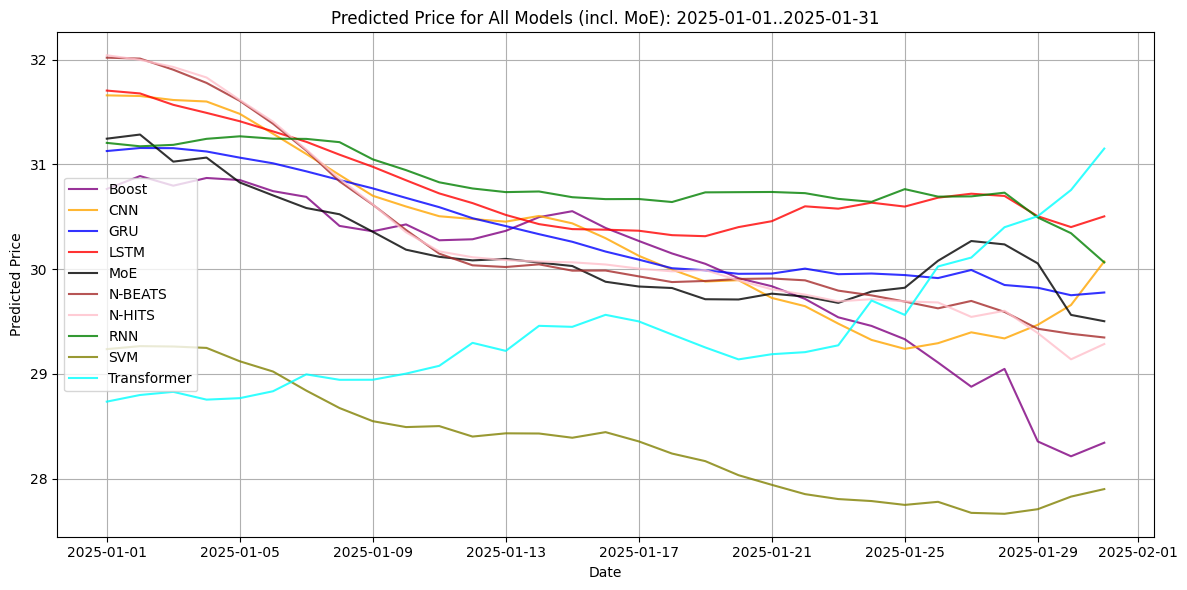


=== HEAD of df_diff_all (Daily Differences, incl. MoE) ===
    Model       Date  Pred_Price_unscaled  ActualPrice  DailyDiff  AbsError
0   Boost 2024-12-02            31.091115       30.742   0.349115  0.349115
1   Boost 2024-12-03            31.282761       31.363  -0.080239  0.080239
2   Boost 2024-12-04            31.519567       31.786  -0.266433  0.266433
3   Boost 2024-12-05            31.179962       31.406  -0.226038  0.226038
4   Boost 2024-12-06            31.389226       31.462  -0.072774  0.072774
5   Boost 2024-12-09            32.061589       32.481  -0.419411  0.419411
6   Boost 2024-12-10            31.804926       32.612  -0.807074  0.807074
7   Boost 2024-12-11            31.346929       32.823  -1.476071  1.476071
8   Boost 2024-12-12            31.187709       31.482  -0.294291  0.294291
9   Boost 2024-12-13            30.724558       30.892  -0.167442  0.167442
10  Boost 2024-12-16            30.010389       30.927  -0.916611  0.916611
11  Boost 2024-12-17        

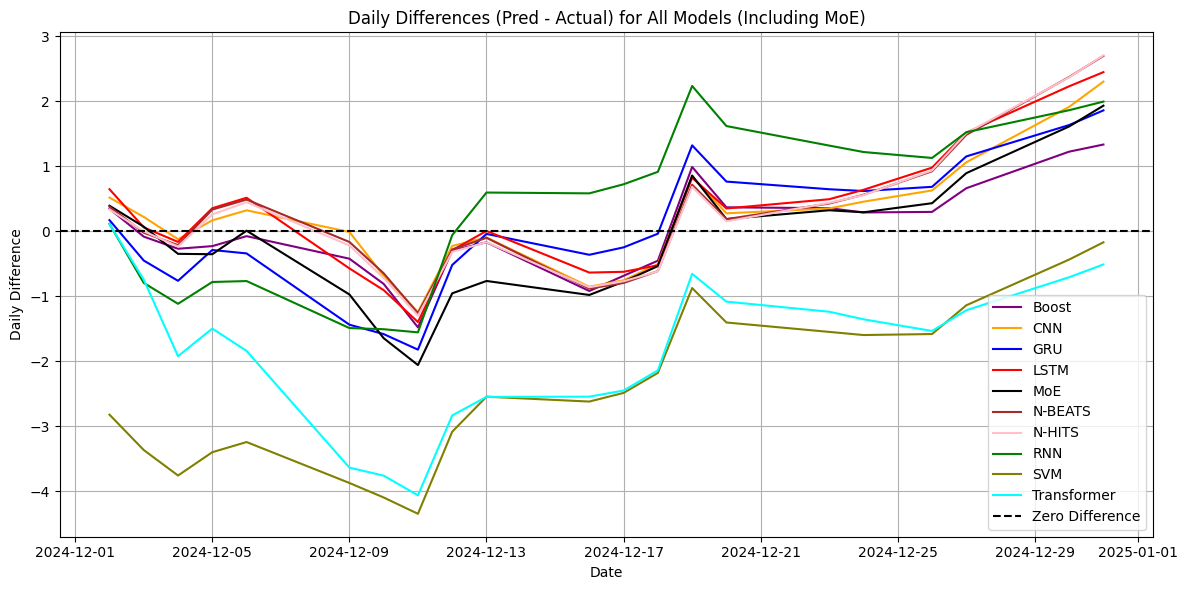


=== Model Scores (Including MoE) ===
         Model  cumulative_error  trend_matching_rate  normalized_error_score  \
0       N-HITS         15.605387                 0.65                0.900566   
1        Boost         11.751144                 0.60                1.000000   
2      N-BEATS         15.552836                 0.60                0.901922   
3          CNN         13.565782                 0.55                0.953185   
4         LSTM         16.188882                 0.55                0.885513   
5          MoE         16.392300                 0.50                0.880265   
6          RNN         23.912927                 0.55                0.686244   
7          GRU         16.733603                 0.40                0.871460   
8          SVM         50.513074                 0.60                0.000000   
9  Transformer         38.338727                 0.40                0.314080   

   combined_confidence  
0             0.725170  
1             0.7200

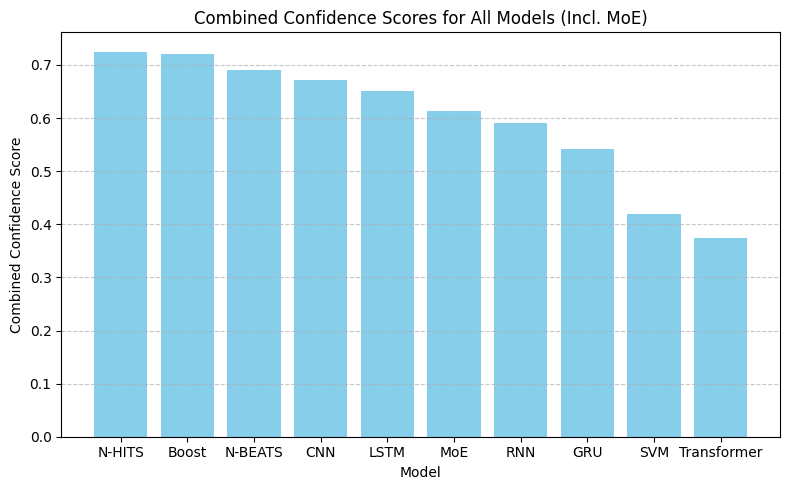


=== Best Polynomial Fitting Results for Top-5 + Actual (Including MoE if in top-5) ===
[Actual] => Deg=6  ValMSE=0.316816
    y = -3.4008e-14*x^6+1.5933e-09*x^5-4.5812e-06*x^4-5.5031e-01*x^3-1.8361e+03*x^2+2.5869e+08*x-2.2262e+12

[N-HITS] => Deg=10  ValMSE=0.046900
    y = -4.9063e-32*x^10+9.8488e-28*x^9+1.9778e-23*x^8+6.6218e-20*x^7-5.3147e-15*x^6-1.6004e-10*x^5-2.1423e-06*x^4+1.0798e-02*x^3+1.2946e+03*x^2+2.5978e+07*x-5.2169e+11

[Boost] => Deg=10  ValMSE=0.068852
    y = -3.3434e-32*x^10+6.7113e-28*x^9+1.3478e-23*x^8+4.5133e-20*x^7-3.6215e-15*x^6-1.0905e-10*x^5-1.4599e-06*x^4+7.3565e-03*x^3+8.8217e+02*x^2+1.7702e+07*x-3.5548e+11

[N-BEATS] => Deg=9  ValMSE=0.046737
    y = -1.4846e-27*x^9+3.6433e-23*x^8+5.6521e-19*x^7-2.0074e-15*x^6-2.4120e-10*x^5-4.8455e-06*x^4-1.6024e-02*x^3+1.8446e+03*x^2+4.7778e+07*x-7.8564e+11

[CNN] => Deg=10  ValMSE=0.084586
    y = -3.7101e-32*x^10+7.4481e-28*x^9+1.4956e-23*x^8+5.0061e-20*x^7-4.0195e-15*x^6-1.2103e-10*x^5-1.6201e-06*x^4+8.1688e-03*x^3+9.79

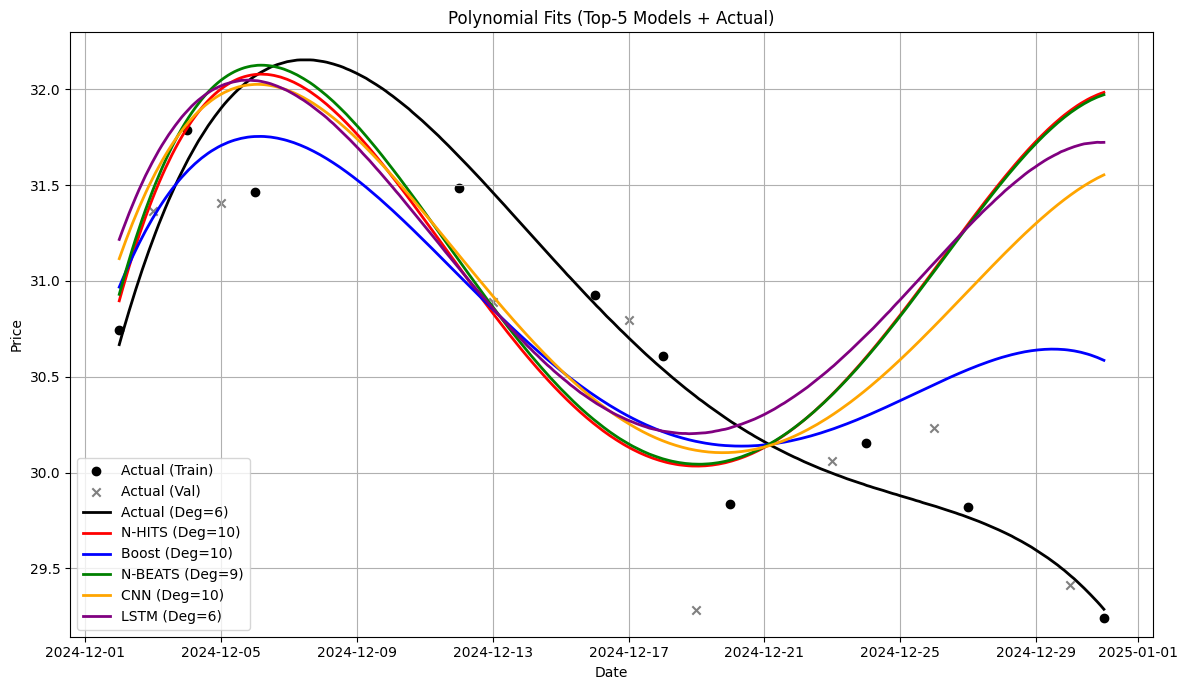

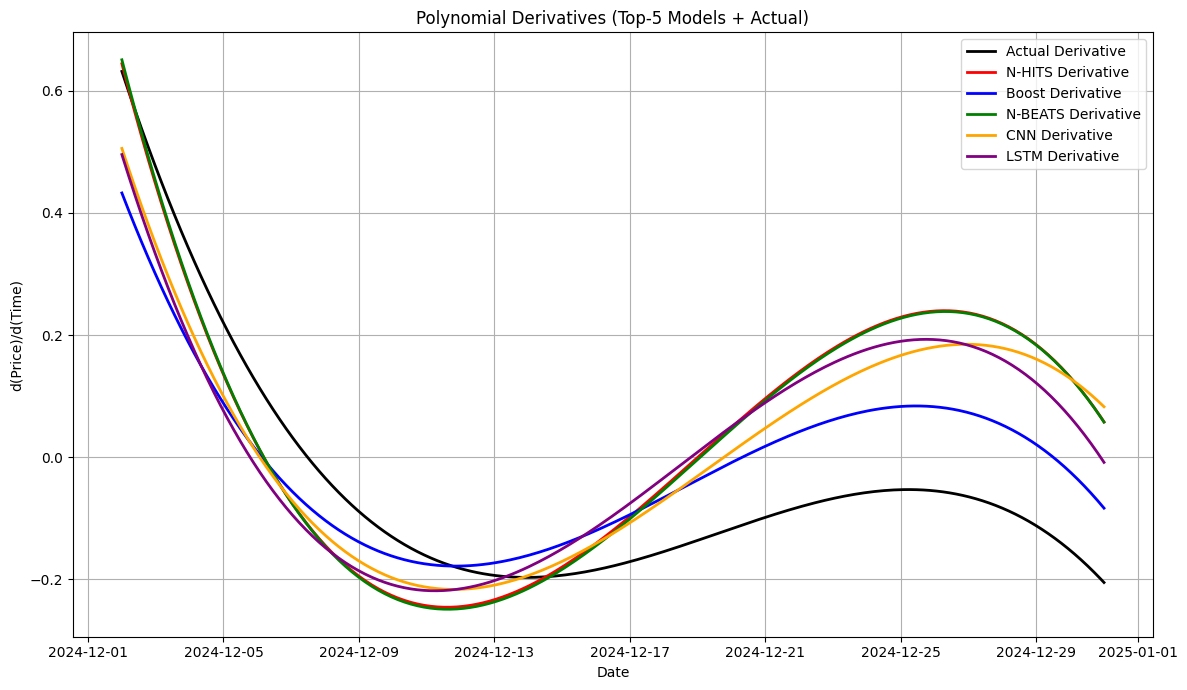


All done!


In [16]:
########################################################
# COMPLETE UPDATED SCRIPT: "MoE" included in everything
########################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import joblib

from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

############################################
# Global seeds & device
############################################
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

############################################
# Globals
############################################
BEST_MODELS_DIR = "."   
features = ["Price","Open","High","Low"]
WINDOW_SIZE = 35

train_cutoff= pd.to_datetime("2024-07-01")
val_cutoff  = pd.to_datetime("2024-11-30")
test_cutoff = pd.to_datetime("2024-12-01")

############################################
# 1) Load & scale data
############################################
def load_and_scale_data(train_csv="Silver Futures Historical Data.csv",
                        complete_csv="Silver Futures Historical Data_Complete.csv"):
    df_traincsv = pd.read_csv(train_csv)
    df_traincsv["Date"] = pd.to_datetime(df_traincsv["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_traincsv.columns:
            df_traincsv.drop(columns=[col], errors="ignore", inplace=True)

    for feat in features:
        if feat not in df_traincsv.columns:
            df_traincsv[feat]= np.nan
        else:
            df_traincsv[feat]= df_traincsv[feat].astype(str).str.replace(",", "", regex=True)
            df_traincsv[feat]= pd.to_numeric(df_traincsv[feat], errors="coerce")

    df_traincsv.sort_values("Date", inplace=True)
    df_traincsv.reset_index(drop=True, inplace=True)

    # Splits
    df_trn = df_traincsv[df_traincsv["Date"]< train_cutoff].copy()
    df_val = df_traincsv[(df_traincsv["Date"]>=train_cutoff)&(df_traincsv["Date"]<= val_cutoff)].copy()
    df_tst = df_traincsv[df_traincsv["Date"]>= test_cutoff].copy()

    df_trn_nonan= df_trn.dropna(subset=features)
    scaler= MinMaxScaler()
    if not df_trn_nonan.empty:
        scaler.fit(df_trn_nonan[features])

    df_trn_scaled= df_trn.copy()
    if not df_trn_nonan.empty:
        df_trn_scaled.loc[df_trn_nonan.index, features]= scaler.transform(df_trn_nonan[features])

    df_val_scaled= df_val.copy()
    val_no_nan= df_val_scaled.dropna(subset=features)
    if not val_no_nan.empty:
        df_val_scaled.loc[val_no_nan.index, features]= scaler.transform(val_no_nan[features])

    df_tst_scaled= df_tst.copy()
    if not df_tst_scaled.empty:
        train_mins= df_trn_nonan[features].min()
        df_tst_filled= df_tst_scaled[features].fillna(train_mins)
        df_tst_scaled.loc[:, features] = scaler.transform(df_tst_filled)

    df_scaled = pd.concat([df_trn_scaled, df_val_scaled, df_tst_scaled], ignore_index=True)
    df_scaled.sort_values("Date", inplace=True)
    df_scaled.reset_index(drop=True, inplace=True)

    # Also load the complete CSV
    df_complete = pd.read_csv(complete_csv)
    df_complete["Date"]= pd.to_datetime(df_complete["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_complete.columns:
            df_complete.drop(columns=[col], errors="ignore", inplace=True)
    for feat in features:
        df_complete[feat]= df_complete[feat].astype(str).str.replace(",", "",regex=True).astype(float)
    df_complete.sort_values("Date", inplace=True)
    df_complete.reset_index(drop=True, inplace=True)

    return df_scaled, df_complete, scaler

############################################
# 2) Model definitions & loading
############################################
class BaseModel(nn.Module):
    def __init__(self, model_type="LSTM", window_width=35):
        super().__init__()
        self.model_type = model_type

        if model_type=="CNN":
            self.conv1 = nn.Conv1d(4,64,3)
            self.conv2 = nn.Conv1d(64,128,3)
            with torch.no_grad():
                dummy = torch.zeros(1,4,window_width)
                outdummy = self.conv2(F.relu(self.conv1(dummy)))
                conv_output_size = outdummy.shape[1]*outdummy.shape[2]
            self.fc = nn.Linear(conv_output_size,4)
        elif model_type=="LSTM":
            self.rnn = nn.LSTM(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)
        elif model_type=="GRU":
            self.rnn = nn.GRU(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)
        elif model_type=="RNN":
            self.rnn = nn.RNN(4,128,num_layers=2,nonlinearity="relu",batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)
        elif model_type=="EnhancedLSTM":
            self.rnn = nn.LSTM(4,128,num_layers=3,batch_first=True,dropout=0.2)
            self.bn  = nn.BatchNorm1d(128)
            self.dropout= nn.Dropout(0.2)
            self.fc= nn.Linear(128,4)
        elif model_type=="Transformer":
            self.input_linear = nn.Linear(4,128)
            enc_layer = nn.TransformerEncoderLayer(d_model=128, nhead=8, dropout=0.1)
            self.transformer_encoder = nn.TransformerEncoder(enc_layer, num_layers=3)
            self.fc = nn.Linear(128,4)
        elif model_type in ["N-BEATS","N-HITS"]:
            self.input_size= window_width*4
            self.blocks= nn.ModuleList([nn.Sequential(
                nn.Linear(self.input_size,128),
                nn.ReLU(),
                nn.Linear(128,128),
                nn.ReLU(),
                nn.Linear(128,4)
            ) for _ in range(3)])
        else:
            raise ValueError(f"Invalid model_type: {model_type}")

    def forward(self, x):
        if self.model_type=="CNN":
            x= x.permute(0,2,1)
            x= F.relu(self.conv1(x))
            x= F.relu(self.conv2(x))
            x= x.view(x.size(0),-1)
            return self.fc(x)
        elif self.model_type in ["LSTM","GRU","RNN"]:
            out, _= self.rnn(x)
            out= out[:,-1,:]
            return self.fc(out)
        elif self.model_type=="EnhancedLSTM":
            out, _= self.rnn(x)
            out = out[:,-1,:]
            out = self.bn(out)
            out = self.dropout(out)
            return self.fc(out)
        elif self.model_type=="Transformer":
            x= self.input_linear(x)   # [batch,window,128]
            x= x.permute(1,0,2)       # [window,batch,128]
            x= self.transformer_encoder(x)
            x= x[-1,:,:]
            return self.fc(x)
        elif self.model_type in ["N-BEATS","N-HITS"]:
            xflat= x.reshape(x.size(0), -1)
            forecast=0
            for block in self.blocks:
                forecast += block(xflat)
            return forecast
        else:
            raise ValueError("Invalid model_type")


class SklearnWrapper:
    def __init__(self, model):
        self.model= model
    def forward(self, x):
        arr= x.cpu().numpy().reshape(1,-1)
        pred= self.model.predict(arr)
        return torch.from_numpy(pred).float().to(x.device)
    def eval(self):
        pass
    def __call__(self, x):
        return self.forward(x)


def load_torch_model(model_type, window_size, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[PyTorch] Loading {model_type} from {path}")
    net= BaseModel(model_type, window_size).to(device)
    net.load_state_dict(torch.load(path, map_location=device))
    net.eval()
    return net

def load_sklearn_model(model_type, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[sklearn] Loading {model_type} => {path}")
    loaded= joblib.load(path)
    return SklearnWrapper(loaded)


############################################
# 3) Rolling multi-day Forecast
############################################
def get_latest_window(df_actual, current_date, window=35, scaler=None):
    mask= df_actual["Date"]< current_date
    sub= df_actual.loc[mask].copy()
    sub.sort_values("Date", inplace=True)
    if len(sub)< window:
        return None
    sub[features]= sub[features].fillna(method="ffill").fillna(method="bfill")
    arr= scaler.transform(sub[features].iloc[-window:].values)
    return arr

def forecast_n_days_from_date(model, df_actual, start_date, window=35, horizon=30,
                              device=None, scaler=None, noise_std=0.01):
    """
    Rolling forecast with mild random noise => more volatility.
    """
    def add_noise_4d(prices, std=0.01):
        noise= np.random.normal(0.0, std, size=prices.shape)
        return np.clip(prices+noise, a_min=0, a_max=None)

    arr_window= get_latest_window(df_actual, start_date, window, scaler)
    if arr_window is None:
        return pd.DataFrame()

    rolling_buffer= np.copy(arr_window)
    forecast_records=[]
    cur_dt= pd.to_datetime(start_date)

    for i in range(horizon):
        X_in= torch.tensor(rolling_buffer,dtype=torch.float).unsqueeze(0).to(device)
        with torch.no_grad():
            out_scaled= model(X_in).cpu().numpy()[0]
        out_unscaled= scaler.inverse_transform(out_scaled.reshape(1,-1))[0]
        out_noisy= add_noise_4d(out_unscaled, noise_std)

        dayx= cur_dt+ pd.Timedelta(days=i)
        forecast_records.append({
            "ForecastDate": dayx,
            "Pred_Price_unscaled": out_noisy[0],
            "Pred_Open_unscaled":  out_noisy[1],
            "Pred_High_unscaled":  out_noisy[2],
            "Pred_Low_unscaled":   out_noisy[3]
        })

        out_noisy_scaled= scaler.transform(out_noisy.reshape(1,-1))[0]
        rolling_buffer= np.vstack([rolling_buffer[1:], out_noisy_scaled.reshape(1,-1)])

    return pd.DataFrame(forecast_records)


def rolling_train_validate_predict_moe(
    df_full, scaler_obj, model_types,
    start_train_cutoff=pd.to_datetime("2024-07-01"),
    start_val_cutoff=pd.to_datetime("2024-11-30"),
    start_pred=pd.to_datetime("2024-12-01"),
    end_pred=pd.to_datetime("2025-01-01"),
    horizon_days=30
):
    """
    For each day in date range [start_pred..end_pred],
    load the best_{mt}_{YYYY-mm-dd}_V1 model, forecast next horizon_days, etc.
    Returns a big DF with predictions from all *loaded* models.
    (If 'MoE' is in model_types, we skip loading from disk unless a file is found.)
    """
    df_sorted= df_full.copy()
    df_sorted.sort_values("Date", inplace=True)

    date_rng= pd.date_range(start_pred, end_pred, freq="D")
    all_records=[]

    for i, day_i in enumerate(date_rng):
        train_cutoff_i= start_train_cutoff + pd.Timedelta(days=i)
        val_cutoff_i  = start_val_cutoff   + pd.Timedelta(days=i)

        print(f"\n=== Rolling Day {day_i.date()} ===")
        print(f"  train_cutoff={train_cutoff_i.date()}  val_cutoff={val_cutoff_i.date()}")
        print(f"  Forecast next {horizon_days} days from {day_i.date()}")

        model_dict={}
        for mt in model_types:
            # If "MoE", we try to see if there's a file "best_MoE_{day_i}_V1" to load
            # Otherwise skip. (This is optional logic if you want to store MoE on disk.)
            if mt=="MoE":
                out_file= f"best_MoE_{day_i.strftime('%Y-%m-%d')}_V1"
                pt_file= os.path.join(BEST_MODELS_DIR, out_file+".pt")
                pkl_file= os.path.join(BEST_MODELS_DIR, out_file+".pkl")
                if os.path.exists(pt_file):
                    net= load_torch_model(mt, WINDOW_SIZE, pt_file)
                    model_dict[mt]= net
                elif os.path.exists(pkl_file):
                    net= load_sklearn_model(mt, pkl_file)
                    model_dict[mt]= net
                else:
                    # no file => skip
                    print(f"[MoE] No saved file for {day_i.date()}, skipping load.")
                continue

            # For normal models
            out_file= f"best_{mt}_{day_i.strftime('%Y-%m-%d')}_V1"
            if mt in ["SVM","GPR","Boost"]:
                out_file+= ".pkl"
                net= load_sklearn_model(mt, os.path.join(BEST_MODELS_DIR, out_file))
            else:
                out_file+= ".pt"
                net= load_torch_model(mt, WINDOW_SIZE, os.path.join(BEST_MODELS_DIR, out_file))
            model_dict[mt]= net

        for mt, netobj in model_dict.items():
            df_fc= forecast_n_days_from_date(
                model=netobj,
                df_actual=df_sorted,
                start_date=day_i,
                window=WINDOW_SIZE,
                horizon=horizon_days,
                device=device,
                scaler=scaler_obj,
                noise_std=0.01
            )
            if not df_fc.empty:
                df_fc["BaseDate"]= day_i
                df_fc["Model"]= mt
                all_records.append(df_fc)

    df_all= pd.concat(all_records, ignore_index=True) if all_records else pd.DataFrame()
    if not df_all.empty:
        df_all.sort_values(["Model","BaseDate","ForecastDate"], inplace=True)
    return df_all

############################################
# 4) Compute Mixture of Experts over entire test range
############################################
def build_mini_models_table(final_rolling_fcst, df_actual):
    """
    Use [2024-12-01..2025-01-01] as the "January weighting" period
    to measure each model's performance for weighting.
    """
    start_jan= pd.to_datetime("2024-12-01")
    end_jan=   pd.to_datetime("2025-01-01")

    df_jan= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= start_jan)&
        (final_rolling_fcst["ForecastDate"]<= end_jan)
    ].copy()
    if df_jan.empty:
        return pd.DataFrame(), 0.01

    df_act_jan= df_actual[
        (df_actual["Date"]>= start_jan)&
        (df_actual["Date"]<= end_jan)
    ].copy()
    df_act_jan.rename(columns={"Date":"ForecastDate","Price":"ActualPrice"}, inplace=True)

    df_merge= pd.merge(
        df_jan[["Model","BaseDate","ForecastDate","Pred_Price_unscaled"]],
        df_act_jan[["ForecastDate","ActualPrice"]],
        on="ForecastDate",
        how="inner"
    )
    df_merge["AbsError"]= (df_merge["Pred_Price_unscaled"]- df_merge["ActualPrice"]).abs()

    # mae
    g_mae= df_merge.groupby(["Model","BaseDate"])["AbsError"].mean().reset_index()
    g_mae.rename(columns={"AbsError":"mae_jan"}, inplace=True)

    # slope alignment => quick polynomial fit
    def poly_slope_diff(sub):
        sub= sub.sort_values("ForecastDate")
        xvals= np.arange(len(sub))
        yvals= sub["Pred_Price_unscaled"].values
        if len(yvals)< 4:
            return 0.5
        coefs= polyfit(xvals,yvals,deg=2)
        y_pred= polyval(xvals, coefs)
        resid= yvals- y_pred
        sse= np.mean(resid**2)
        return float(np.exp(-sse))

    def group_slope_func(grp):
        grp["slopeAlign_jan"]= poly_slope_diff(grp)
        return grp

    df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
    df_slope_agg= df_slope.groupby(["Model","BaseDate"])["slopeAlign_jan"].mean().reset_index()

    # real vol
    df_act_jan_sorted= df_act_jan.drop_duplicates("ForecastDate").copy()
    df_act_jan_sorted.sort_values("ForecastDate", inplace=True)
    df_act_jan_sorted["DayChange"]= df_act_jan_sorted["ActualPrice"].diff()
    real_vol= df_act_jan_sorted["DayChange"].std(skipna=True)
    if pd.isna(real_vol) or real_vol< 1e-9:
        real_vol= 0.01

    def mini_volatility(sub):
        sub= sub.sort_values("ForecastDate")
        sub["DayChange"]= sub["Pred_Price_unscaled"].diff()
        vol_= sub["DayChange"].std(skipna=True)
        if pd.isna(vol_):
            vol_= 0.01
        return vol_

    g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()
    g_vol.rename(columns={0:"predVol_jan"}, inplace=True)

    def vol_align(v):
        ratio= v/ real_vol
        return np.exp(-abs(ratio-1.0))

    g_vol["volAlign_jan"]= g_vol["predVol_jan"].apply(vol_align)

    mini_models= pd.merge(g_mae, df_slope_agg, on=["Model","BaseDate"], how="left")
    mini_models= pd.merge(mini_models, g_vol[["Model","BaseDate","predVol_jan","volAlign_jan"]], on=["Model","BaseDate"], how="left")

    mae_min= mini_models["mae_jan"].min()
    mae_max= mini_models["mae_jan"].max()
    if np.isclose(mae_min, mae_max):
        mini_models["baseAcc"]= 1.0
    else:
        mini_models["baseAcc"]= 1.0 - ((mini_models["mae_jan"]-mae_min)/(mae_max-mae_min))

    return mini_models, real_vol

def compute_super_advanced_moe(final_rolling_fcst, df_actual):
    """
    Weighted "Mixture of Experts" for entire [2024-12-01..2025-01-31],
    including pre-2025-01-02 dates if you want MoE to appear from 2024-12-01 onward.
    """
    print("\n=== SUPER ADVANCED MOE w/ Polynomials & Voting ===\n")
    mini_models, real_vol= build_mini_models_table(final_rolling_fcst, df_actual)
    if mini_models.empty:
        print("No january data => fallback => uniform daily average")
        return pd.DataFrame(columns=["ForecastDate","MOE_Price"])

    mm_dict={}
    for i,row in mini_models.iterrows():
        mm_dict[(row["Model"], row["BaseDate"])]= {
            "baseAcc": row["baseAcc"],
            "slopeAlign_jan": row["slopeAlign_jan"],
            "volAlign_jan": row["volAlign_jan"]
        }

    # We'll produce MoE from 2024-12-01..2025-01-31
    start_moe= pd.to_datetime("2024-12-01")
    end_moe=   pd.to_datetime("2025-01-31")
    all_days=  pd.date_range(start_moe, end_moe, freq="D")

    records=[]

    # For each day, gather all base model predictions from final_rolling_fcst,
    # compute the weighted average => day_moe
    for d in all_days:
        df_d= final_rolling_fcst[ final_rolling_fcst["ForecastDate"]== d ].copy()
        if df_d.empty:
            continue

        d_prev= d - pd.Timedelta(days=1)
        ups=0
        downs=0
        total=0
        w_sums=0.0
        weighted_price=0.0

        for idx,row in df_d.iterrows():
            m= row["Model"]
            bD= row["BaseDate"]
            if (m,bD) not in mm_dict:
                # skip if model not found in january weighting table
                continue

            baseAcc= mm_dict[(m,bD)]["baseAcc"]
            slopeA= mm_dict[(m,bD)]["slopeAlign_jan"]
            volA= mm_dict[(m,bD)]["volAlign_jan"]

            # direction factor from previous day
            df_dprev= final_rolling_fcst[
                (final_rolling_fcst["Model"]==m)&
                (final_rolling_fcst["BaseDate"]==bD)&
                (final_rolling_fcst["ForecastDate"]==d_prev)
            ]
            if df_dprev.empty:
                dirFactor=1.0
            else:
                pd_today= row["Pred_Price_unscaled"]
                pd_yest= df_dprev["Pred_Price_unscaled"].values[0]
                if pd_today> pd_yest:
                    ups+=1
                    dirFactor=1.1
                elif pd_today< pd_yest:
                    downs+=1
                    dirFactor=0.9
                else:
                    dirFactor=1.0
                total+=1

            w= baseAcc*slopeA*volA*dirFactor
            w_sums+= w
            weighted_price+= w* row["Pred_Price_unscaled"]

        if np.isclose(w_sums,0.0):
            # fallback => simple average
            day_moe= df_d["Pred_Price_unscaled"].mean()
        else:
            day_moe= weighted_price/ w_sums

        # if many models show "up" or "down"
        if total>0:
            fraction_up= ups/ total
            fraction_down= downs/ total
            if fraction_up> 0.7:
                day_moe*= 1.01
            elif fraction_down> 0.7:
                day_moe*= 0.99

        # mild random noise
        day_moe+= np.random.normal(0, day_moe*0.002)
        records.append({"ForecastDate": d, "MOE_Price": day_moe})

    df_moe= pd.DataFrame(records)
    df_moe.sort_values("ForecastDate", inplace=True)
    return df_moe

############################################
# 5) Plot "All Models" incl. MoE
############################################
def plot_predicted_price_all_models(df_rolled_all, from_d, to_d):
    df_sel= df_rolled_all[
        (df_rolled_all["ForecastDate"]>= from_d)&
        (df_rolled_all["ForecastDate"]<= to_d)
    ].copy()
    if df_sel.empty:
        print("No data to plot in that date range.")
        return

    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","EnhancedLSTM":"magenta",
        "Transformer":"cyan","N-BEATS":"brown","N-HITS":"pink","SVM":"olive","Boost":"purple","MoE":"black"
    }
    for model_name in df_sel["Model"].unique():
        sub= df_sel[df_sel["Model"]== model_name].copy()
        sub_agg= sub.groupby("ForecastDate", as_index=False)["Pred_Price_unscaled"].mean()
        c= color_map.get(model_name, "gray")
        plt.plot(sub_agg["ForecastDate"], sub_agg["Pred_Price_unscaled"], color=c,
                 label=model_name, alpha=0.8)

    plt.title(f"Predicted Price for All Models (incl. MoE): {from_d.date()}..{to_d.date()}")
    plt.xlabel("Date")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# 6) Combine base + MoE => single DF
############################################
def reduce_duplicates(df_in):
    # average 'Pred_Price_unscaled' if duplicates
    agg_df = df_in.groupby(["Model","ForecastDate"], as_index=False).agg({
        "Pred_Price_unscaled":"mean"
    })
    return agg_df

def combine_base_and_moe(final_rolling_fc, df_moe):
    df_moe_cpy = df_moe.copy()
    df_moe_cpy["Model"] = "MoE"
    df_moe_cpy["BaseDate"] = pd.NaT
    df_moe_cpy.rename(columns={"MOE_Price":"Pred_Price_unscaled"}, inplace=True)

    df_base = final_rolling_fc[["Model","ForecastDate","Pred_Price_unscaled"]].copy()
    df_combined = pd.concat([df_base, df_moe_cpy], ignore_index=True)

    df_no_dupes = reduce_duplicates(df_combined)
    df_no_dupes.sort_values(["Model","ForecastDate"], inplace=True, ignore_index=True)
    return df_no_dupes

############################################
# 7) Daily Differences
############################################
def merge_with_actual_and_diff(df_all_models, df_actual):
    df_actual_cpy = df_actual[["Date","Price"]].rename(columns={"Price":"ActualPrice"}).copy()

    df_merged = pd.merge(
        df_all_models,
        df_actual_cpy,
        left_on="ForecastDate",
        right_on="Date",
        how="left"
    )
    df_merged.dropna(subset=["ActualPrice"], inplace=True)
    df_merged.drop(columns=["Date"], inplace=True, errors="ignore")

    df_merged.rename(columns={"ForecastDate":"Date"}, inplace=True)
    df_merged["DailyDiff"] = df_merged["Pred_Price_unscaled"] - df_merged["ActualPrice"]
    df_merged["AbsError"]  = df_merged["DailyDiff"].abs()

    df_merged.sort_values(["Model","Date"], inplace=True)
    df_merged.reset_index(drop=True, inplace=True)
    return df_merged

def plot_daily_differences_all_models(df_diff):
    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","EnhancedLSTM":"magenta",
        "Transformer":"cyan","N-BEATS":"brown","N-HITS":"pink","SVM":"olive","Boost":"purple","MoE":"black"
    }
    for m in df_diff["Model"].unique():
        sub= df_diff[df_diff["Model"]==m].copy()
        sub_agg= sub.groupby("Date", as_index=False)["DailyDiff"].mean()
        c= color_map.get(m,"gray")
        plt.plot(sub_agg["Date"], sub_agg["DailyDiff"], label=m, color=c)

    plt.axhline(0, color="black", linestyle="--", label="Zero Difference")
    plt.title("Daily Differences (Pred - Actual) for All Models (Including MoE)")
    plt.xlabel("Date")
    plt.ylabel("Daily Difference")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# 8) Evaluate errors & confidence => top-5
############################################
def evaluate_models_confidence(df_diff):
    model_scores = {}
    for m in df_diff["Model"].unique():
        dsub= df_diff[df_diff["Model"]==m].copy()
        if dsub.empty: 
            continue
        cum_err= dsub["AbsError"].sum()

        dsub.sort_values("Date", inplace=True)
        dsub["ActualDiff"] = dsub["ActualPrice"].diff()
        dsub["PredDiff"]   = dsub["Pred_Price_unscaled"].diff()
        dsub_valid= dsub.dropna(subset=["ActualDiff","PredDiff"]).copy()

        def sign_match(a,b):
            if a==0 and b==0:
                return True
            return np.sign(a)==np.sign(b)
        dsub_valid["TrendMatch"] = dsub_valid.apply(
            lambda r: 1 if sign_match(r["ActualDiff"],r["PredDiff"]) else 0,
            axis=1
        )
        trend_rate= dsub_valid["TrendMatch"].mean() if len(dsub_valid)>0 else 0.0

        model_scores[m] = {
            "cumulative_error": cum_err,
            "trend_matching_rate": trend_rate
        }

    df_scores= pd.DataFrame.from_dict(model_scores, orient="index").reset_index()
    df_scores.rename(columns={"index":"Model"}, inplace=True)

    if not df_scores.empty:
        ce_min= df_scores["cumulative_error"].min()
        ce_max= df_scores["cumulative_error"].max()
        if not np.isclose(ce_min, ce_max):
            df_scores["normalized_error_score"] = 1.0 - (df_scores["cumulative_error"]-ce_min)/(ce_max-ce_min)
        else:
            df_scores["normalized_error_score"] = 1.0
        # Weighted combo => 70% trend, 30% error
        df_scores["combined_confidence"] = 0.7*df_scores["trend_matching_rate"] + 0.3*df_scores["normalized_error_score"]
        df_scores.sort_values("combined_confidence", ascending=False, inplace=True)
        df_scores.reset_index(drop=True, inplace=True)
    return df_scores

def barplot_confidence_scores(df_scores):
    plt.figure(figsize=(8,5))
    plt.bar(df_scores["Model"], df_scores["combined_confidence"], color="skyblue")
    plt.xlabel("Model")
    plt.ylabel("Combined Confidence Score")
    plt.title("Combined Confidence Scores for All Models (Incl. MoE)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

############################################
# 9) Polynomial fitting top-5
############################################
def polynomial_fit_top5_models(df_diff, df_scores, max_degree=70):
    top5 = df_scores.head(5)["Model"].tolist()
    # pivot => row=Date, col=Model => Pred_Price_unscaled
    df_pivot = df_diff.pivot_table(
        index="Date", columns="Model", values="Pred_Price_unscaled", aggfunc="mean"
    ).reset_index()

    # also gather Actual
    df_actual_only = df_diff.drop_duplicates("Date")[["Date","ActualPrice"]].copy()
    df_merged = pd.merge(df_pivot, df_actual_only, on="Date", how="inner")
    df_merged.rename(columns={"ActualPrice":"Actual"}, inplace=True)
    df_merged.sort_values("Date", inplace=True)
    df_merged.reset_index(drop=True, inplace=True)

    columns_to_fit = ["Actual"] + top5
    df_merged = df_merged[["Date"] + columns_to_fit].dropna()
    if df_merged.empty:
        print("No data available to do polynomial fitting for top-5 (including MoE).")
        return

    df_merged["mdates_num"] = mdates.date2num(df_merged["Date"])
    n_points = len(df_merged)
    idx= np.arange(n_points)
    train_mask= (idx % 2==0)
    val_mask= ~train_mask

    def format_poly(coefs):
        terms=[]
        deg= len(coefs)-1
        for i,c in enumerate(coefs):
            p= deg-i
            if p>1:
                terms.append(f"{c:+.4e}*x^{p}")
            elif p==1:
                terms.append(f"{c:+.4e}*x")
            else:
                terms.append(f"{c:+.4e}")
        expr= "".join(terms).replace("+-","-")
        if expr.startswith("+"):
            expr= expr[1:]
        return expr

    best_poly= {}
    from sklearn.metrics import mean_squared_error

    for col in columns_to_fit:
        x_train= df_merged.loc[train_mask,"mdates_num"].values
        y_train= df_merged.loc[train_mask,col].values
        x_val= df_merged.loc[val_mask,"mdates_num"].values
        y_val= df_merged.loc[val_mask,col].values

        best_deg= None
        best_mse= float("inf")
        best_coefs= None
        for d_ in range(1, max_degree+1):
            if len(x_train)<=d_:
                break
            coefs= np.polyfit(x_train, y_train, d_)
            y_pred_val= np.polyval(coefs, x_val)
            mse_ = mean_squared_error(y_val, y_pred_val)
            if mse_< best_mse:
                best_mse= mse_
                best_deg= d_
                best_coefs= coefs
        if best_coefs is not None:
            best_poly[col]= {
                "degree": best_deg,
                "mse": best_mse,
                "coeffs": best_coefs
            }
        else:
            best_poly[col]= {
                "degree":0,"mse":9999.0,"coeffs":[0.0]
            }

    print("\n=== Best Polynomial Fitting Results for Top-5 + Actual (Including MoE if in top-5) ===")
    for col in columns_to_fit:
        info= best_poly[col]
        expr= format_poly(info["coeffs"])
        print(f"[{col}] => Deg={info['degree']}  ValMSE={info['mse']:.6f}")
        print(f"    y = {expr}\n")

    # Plot polynomials
    plt.figure(figsize=(12,7))
    color_list= ["black","red","blue","green","orange","purple","pink","brown","olive","cyan"]
    color_map= {}
    # "Actual" always black
    color_map["Actual"] = "black"
    for i,m in enumerate(top5):
        if i<len(color_list)-1:
            color_map[m] = color_list[i+1]
        else:
            color_map[m] = "gray"

    # scatter actual data
    plt.scatter(df_merged.loc[train_mask,"Date"], df_merged.loc[train_mask,"Actual"],
                color="black", marker="o", label="Actual (Train)")
    plt.scatter(df_merged.loc[val_mask,"Date"], df_merged.loc[val_mask,"Actual"],
                color="gray", marker="x", label="Actual (Val)")

    x_dense= np.linspace(df_merged["mdates_num"].min(), df_merged["mdates_num"].max(),300)
    x_dense_dates= [mdates.num2date(xx) for xx in x_dense]

    for col in columns_to_fit:
        coefs= best_poly[col]["coeffs"]
        y_dense= np.polyval(coefs, x_dense)
        c= color_map.get(col,"gray")
        plt.plot(x_dense_dates, y_dense, color=c, lw=2, label=f"{col} (Deg={best_poly[col]['degree']})")

    plt.title("Polynomial Fits (Top-5 Models + Actual)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Derivatives
    plt.figure(figsize=(12,7))
    for col in columns_to_fit:
        coefs= best_poly[col]["coeffs"]
        d_coefs= np.polyder(coefs)
        y_deriv= np.polyval(d_coefs, x_dense)
        c= color_map.get(col,"gray")
        plt.plot(x_dense_dates, y_deriv, color=c, lw=2, label=f"{col} Derivative")

    plt.title("Polynomial Derivatives (Top-5 Models + Actual)")
    plt.xlabel("Date")
    plt.ylabel("d(Price)/d(Time)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# 10) MAIN
############################################
if __name__=="__main__":
    # 0) We include "MoE" in model_types => so it's recognized in logic.
    all_model_types= [
        "LSTM","GRU","RNN","CNN","Transformer","N-BEATS","N-HITS","SVM","Boost","MoE"
    ]

    # 1) Load & scale data
    df_scaled, df_complete_all, scaler= load_and_scale_data(
        "Silver Futures Historical Data.csv",
        "Silver Futures Historical Data_Complete.csv"
    )

    # 2) Rolling multi-day forecasts for base models (and MoE if there's a file)
    final_rolling_fc= rolling_train_validate_predict_moe(
        df_full= df_complete_all,
        scaler_obj= scaler,
        model_types=all_model_types,  # includes "MoE"
        start_train_cutoff=train_cutoff,
        start_val_cutoff=val_cutoff,
        start_pred=pd.to_datetime("2024-12-01"),
        end_pred=pd.to_datetime("2025-01-02"),
        horizon_days=30
    )
    print("\n=== HEAD of final_rolling_fc (9 or 10 loaded models) ===")
    print(final_rolling_fc.head(20))

    # 3) If MoE wasn't loaded from disk, we compute it now for the entire test range
    #    so that it appears in the daily difference & top-5 selection as well.
    #    This function merges base model predictions => weighted MoE for [2024-12-01..2025-01-31].
    if not any(final_rolling_fc["Model"]=="MoE"):
        # If no MoE rows exist, let's create them:
        df_moe= compute_super_advanced_moe(final_rolling_fc, df_complete_all)
        print("\n=== HEAD of df_moe (Computed Mixture of Experts) ===")
        print(df_moe.head(20))
        # then unify with the base models
        df_rolled_all= combine_base_and_moe(final_rolling_fc, df_moe)
    else:
        # If we already loaded MoE from disk, it's already in final_rolling_fc
        df_rolled_all= final_rolling_fc.copy()

    print("\n=== HEAD of df_rolled_all (All Models + MoE) ===")
    print(df_rolled_all.head(20))

    # 4) Plot predicted price for ALL models (including MoE)
    plot_predicted_price_all_models(
        df_rolled_all,
        from_d=pd.to_datetime("2025-01-01"),
        to_d=pd.to_datetime("2025-01-31")
    )

    # 5) Merge with actual => daily differences
    df_diff_all = merge_with_actual_and_diff(df_rolled_all, df_complete_all)
    print("\n=== HEAD of df_diff_all (Daily Differences, incl. MoE) ===")
    print(df_diff_all.head(20))

    # 6) Plot daily differences => includes MoE
    plot_daily_differences_all_models(df_diff_all)

    # 7) Evaluate errors & confidence => top-5
    df_scores = evaluate_models_confidence(df_diff_all)
    print("\n=== Model Scores (Including MoE) ===")
    print(df_scores)

    # 8) Bar chart
    barplot_confidence_scores(df_scores)

    # 9) Polynomial fitting for top-5 (this can now include MoE if MoE is in top 5)
    polynomial_fit_top5_models(df_diff_all, df_scores, max_degree=70)

    print("\nAll done!")
